In [1]:
#!for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done
import tensorflow as tf
import os
from data_processing import dataset
from models import model
from utils import tools
from plots import plots, edge_detection_plots, flow_prediction_plots

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

2023-01-26 16:41:45.544992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 16:41:45.636691: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-26 16:41:45.658562: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-26 16:41:46.075509: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
config_directory = 'flow_edge'

config_path = os.path.join(os.getcwd(), 'configs', config_directory)
DataProcessing = dataset.DataProcessing(config_path=config_path)
Model = model.Model(config_path)
tools.parser(Model.cfg, DataProcessing.cfg)
Model.load_data(DataProcessing.cfg["NAME"])
DataProcessing.path_definitions()

2023-01-26 16:41:53.021171: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-26 16:41:53.021221: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (david-ThinkPad-X1-Yoga-Gen-6): /proc/driver/nvidia/version does not exist
2023-01-26 16:41:53.022141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load Dataset, Preprocess Images and Dataset

The TRAIN DS contains 18 images.
The TEST DS contains 18 images.


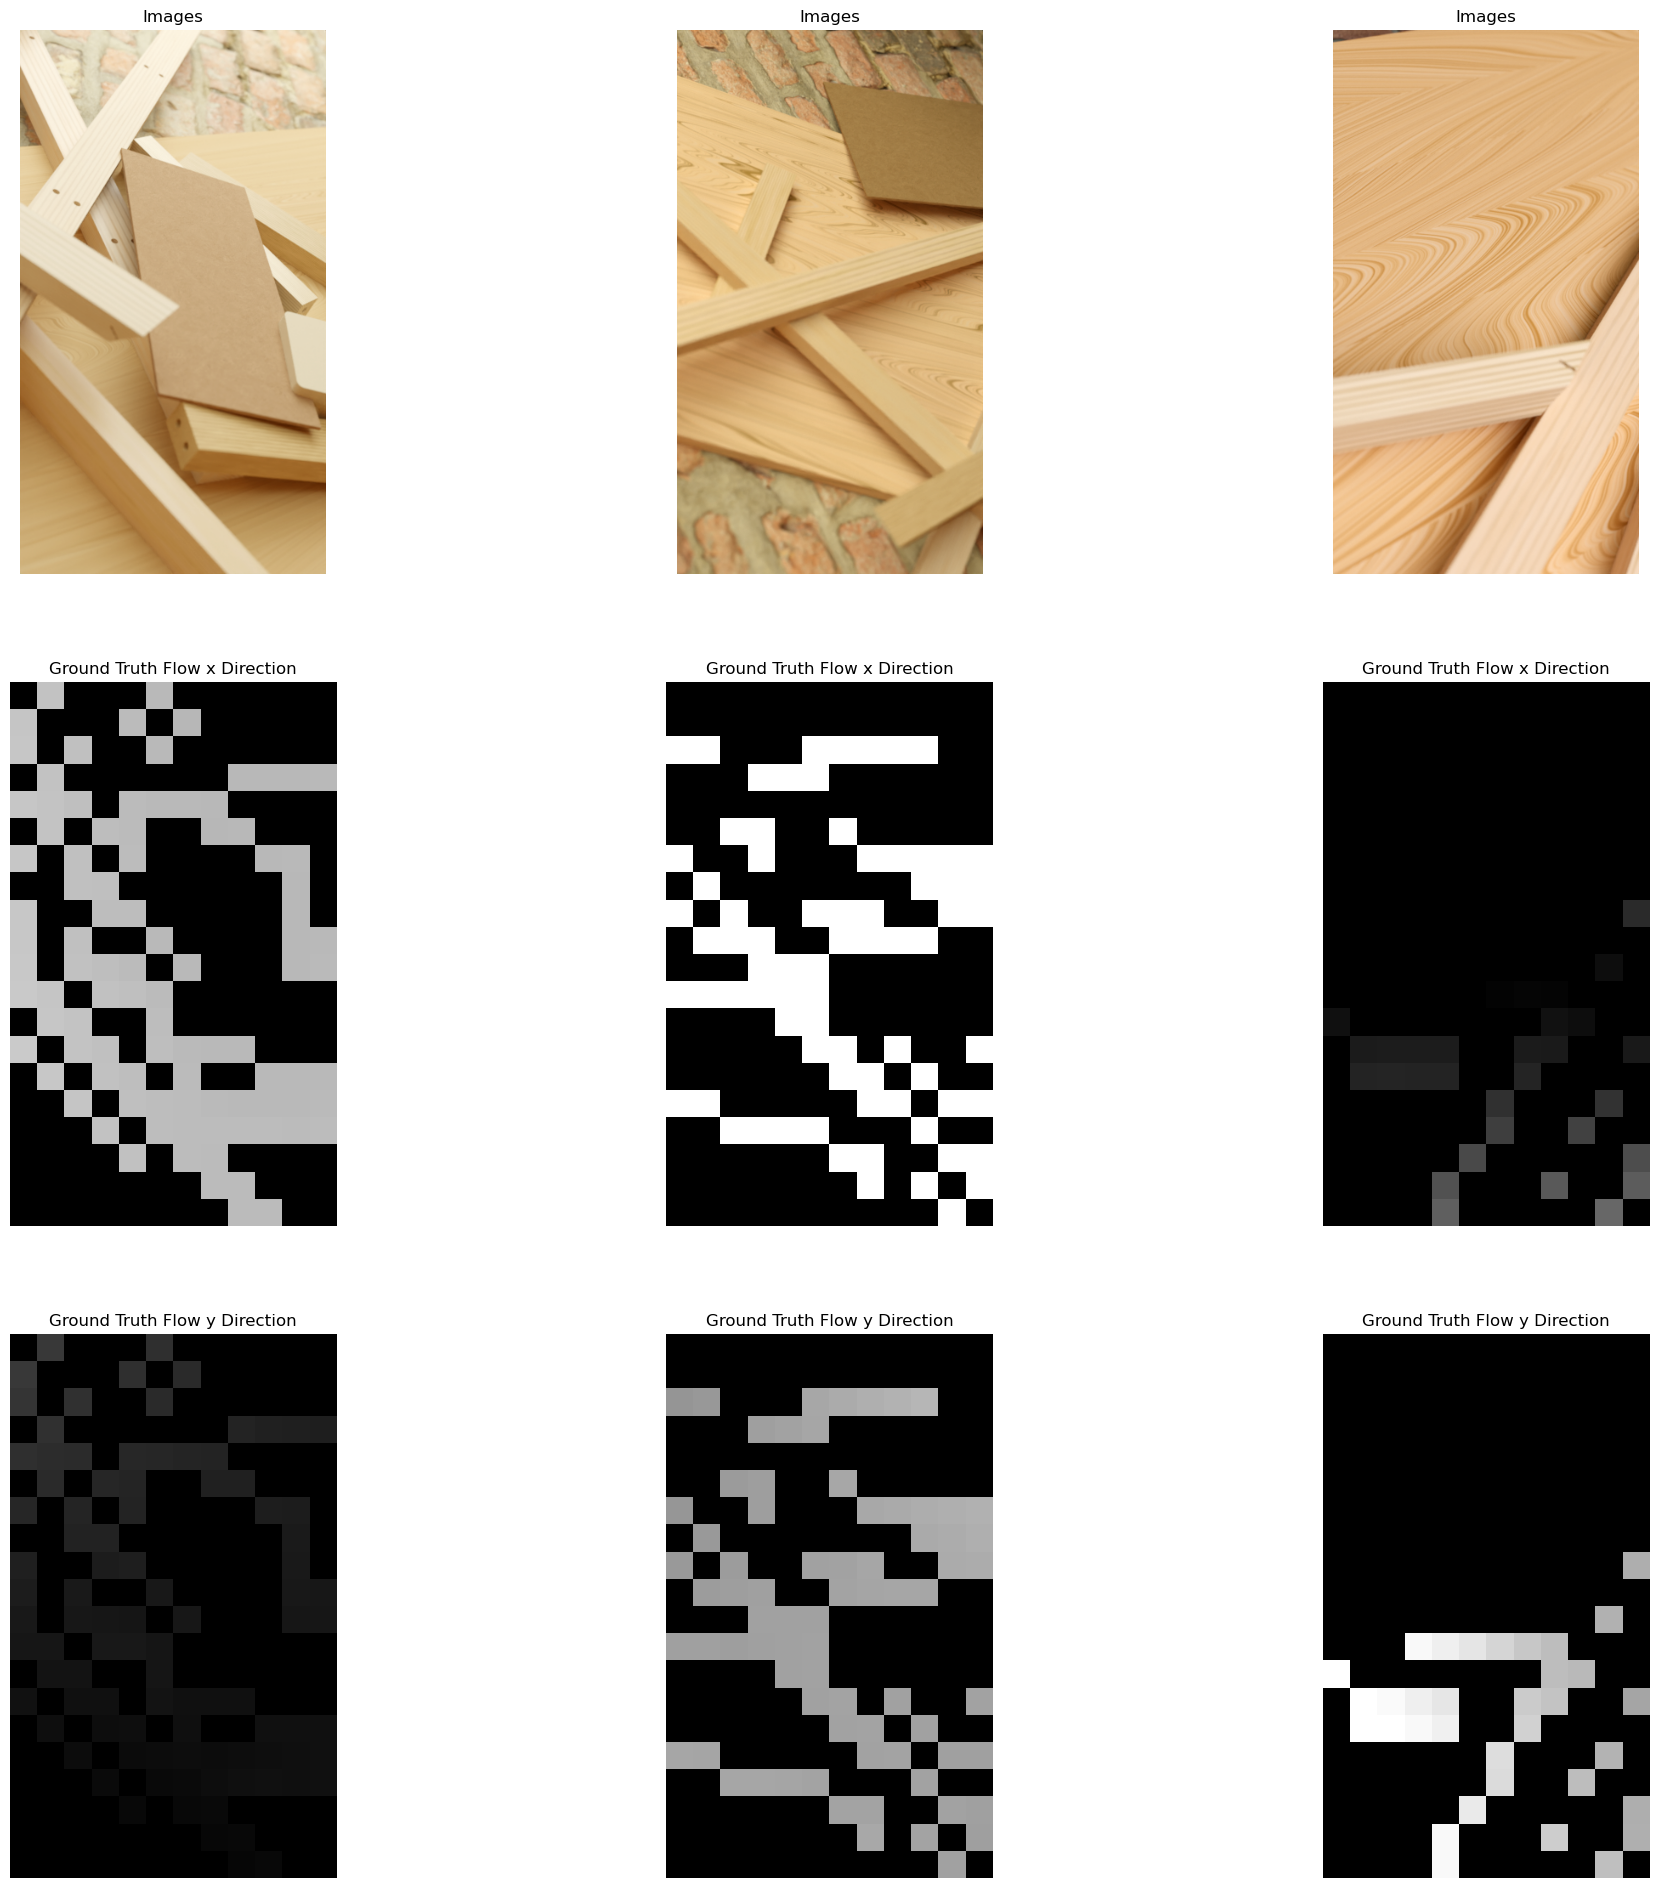

In [3]:
if Model.train_model:
    train_ds, img_count_train = DataProcessing.load_dataset(DataProcessing.key.train)
test_ds, img_count_test = DataProcessing.load_dataset(DataProcessing.key.test)

if Model.train_model:
    for inp, out in test_ds.take(1):
        flow_prediction_plots.plot_flow_field(images=inp['in_img'],
                                              flow_ground_truth=out['out_flow'],
                                              batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'])


# Define, Compile and Train Model

In [4]:
if Model.train_model:
    model = Model.get_neural_network_model(DataProcessing.input_data_cfg, DataProcessing.output_data_cfg)
    # model.summary()

    lr = Model.get_lr(img_count_train, DataProcessing.cfg['TRAIN']['BATCH_SIZE'])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss=Model.get_loss_function(DataProcessing.output_data_cfg),
                  metrics=Model.get_metrics(DataProcessing.output_data_cfg))

    history = model.fit(train_ds, epochs=Model.cfg["EPOCHS"], validation_data=train_ds,
                        callbacks=Model.get_callbacks(), verbose=1)

model = Model.get_best_model_from_checkpoints()

Epoch 1/1000
6/6 [==============================] - 4s 247ms/step - loss: 1287.3185 - out_flow_loss: 67.9233 - out_edge_loss: 1219.3953 - accuracy: 0.7822 - accuracy_edge_1: 0.7822 - f1_edge: 0.1483 - precision_edge: 0.1294 - recall_edge: 0.1746 - f1_edge_1: 0.1483 - precision_edge_1: 0.1294 - recall_edge_1: 0.1746 - val_loss: 2658.8479 - val_out_flow_loss: 68.7498 - val_out_edge_loss: 2590.0979 - val_accuracy: 0.8487 - val_accuracy_edge_1: 0.8487 - val_f1_edge: 0.1254 - val_precision_edge: 0.2095 - val_recall_edge: 0.0895 - val_f1_edge_1: 0.1254 - val_precision_edge_1: 0.2095 - val_recall_edge_1: 0.0895
Epoch 2/1000
6/6 [==============================] - 1s 151ms/step - loss: 838.5311 - out_flow_loss: 78.9755 - out_edge_loss: 759.5556 - accuracy: 0.7478 - accuracy_edge_1: 0.7478 - f1_edge: 0.2588 - precision_edge: 0.2168 - recall_edge: 0.3276 - f1_edge_1: 0.2588 - precision_edge_1: 0.2168 - recall_edge_1: 0.3276 - val_loss: 1185.4130 - val_out_flow_loss: 67.8052 - val_out_edge_loss: 1

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=276.52-epoch=10.00-f1=0.3704/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=276.52-epoch=10.00-f1=0.3704/assets


6/6 [==============================] - 6s 1s/step - loss: 262.8158 - out_flow_loss: 65.4559 - out_edge_loss: 197.3598 - accuracy: 0.8295 - accuracy_edge_1: 0.8295 - f1_edge: 0.4055 - precision_edge: 0.3310 - recall_edge: 0.5268 - f1_edge_1: 0.4055 - precision_edge_1: 0.3310 - recall_edge_1: 0.5268 - val_loss: 276.5161 - val_out_flow_loss: 63.6398 - val_out_edge_loss: 212.8764 - val_accuracy: 0.8148 - val_accuracy_edge_1: 0.8148 - val_f1_edge: 0.3704 - val_precision_edge: 0.3151 - val_recall_edge: 0.4492 - val_f1_edge_1: 0.3704 - val_precision_edge_1: 0.3151 - val_recall_edge_1: 0.4492
Epoch 11/1000
6/6 [==============================] - 1s 148ms/step - loss: 250.2784 - out_flow_loss: 66.7579 - out_edge_loss: 183.5206 - accuracy: 0.8274 - accuracy_edge_1: 0.8274 - f1_edge: 0.4449 - precision_edge: 0.3875 - recall_edge: 0.5268 - f1_edge_1: 0.4449 - precision_edge_1: 0.3875 - recall_edge_1: 0.5268 - val_loss: 263.4721 - val_out_flow_loss: 68.1153 - val_out_edge_loss: 195.3569 - val_accura

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=210.21-epoch=20.00-f1=0.4275/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=210.21-epoch=20.00-f1=0.4275/assets


6/6 [==============================] - 5s 1s/step - loss: 207.1289 - out_flow_loss: 70.7890 - out_edge_loss: 136.3398 - accuracy: 0.8611 - accuracy_edge_1: 0.8611 - f1_edge: 0.4902 - precision_edge: 0.4260 - recall_edge: 0.5847 - f1_edge_1: 0.4902 - precision_edge_1: 0.4260 - recall_edge_1: 0.5847 - val_loss: 210.2140 - val_out_flow_loss: 59.8349 - val_out_edge_loss: 150.3790 - val_accuracy: 0.8226 - val_accuracy_edge_1: 0.8226 - val_f1_edge: 0.4275 - val_precision_edge: 0.3512 - val_recall_edge: 0.5461 - val_f1_edge_1: 0.4275 - val_precision_edge_1: 0.3512 - val_recall_edge_1: 0.5461
Epoch 21/1000
6/6 [==============================] - 1s 163ms/step - loss: 204.8628 - out_flow_loss: 66.2521 - out_edge_loss: 138.6107 - accuracy: 0.8534 - accuracy_edge_1: 0.8534 - f1_edge: 0.5111 - precision_edge: 0.4669 - recall_edge: 0.5725 - f1_edge_1: 0.5111 - precision_edge_1: 0.4669 - recall_edge_1: 0.5725 - val_loss: 214.0176 - val_out_flow_loss: 64.1397 - val_out_edge_loss: 149.8779 - val_accura

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=167.55-epoch=30.00-f1=0.5105/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=167.55-epoch=30.00-f1=0.5105/assets


6/6 [==============================] - 6s 1s/step - loss: 168.2762 - out_flow_loss: 52.4238 - out_edge_loss: 115.8525 - accuracy: 0.8783 - accuracy_edge_1: 0.8783 - f1_edge: 0.5578 - precision_edge: 0.5199 - recall_edge: 0.6055 - f1_edge_1: 0.5578 - precision_edge_1: 0.5199 - recall_edge_1: 0.6055 - val_loss: 167.5468 - val_out_flow_loss: 41.8023 - val_out_edge_loss: 125.7445 - val_accuracy: 0.8533 - val_accuracy_edge_1: 0.8533 - val_f1_edge: 0.5105 - val_precision_edge: 0.4286 - val_recall_edge: 0.6308 - val_f1_edge_1: 0.5105 - val_precision_edge_1: 0.4286 - val_recall_edge_1: 0.6308
Epoch 31/1000
6/6 [==============================] - 1s 160ms/step - loss: 165.2429 - out_flow_loss: 51.0749 - out_edge_loss: 114.1680 - accuracy: 0.8795 - accuracy_edge_1: 0.8795 - f1_edge: 0.5821 - precision_edge: 0.5249 - recall_edge: 0.6540 - f1_edge_1: 0.5821 - precision_edge_1: 0.5249 - recall_edge_1: 0.6540 - val_loss: 165.8744 - val_out_flow_loss: 44.1546 - val_out_edge_loss: 121.7198 - val_accura

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=143.80-epoch=40.00-f1=0.5784/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=143.80-epoch=40.00-f1=0.5784/assets


6/6 [==============================] - 6s 1s/step - loss: 141.7089 - out_flow_loss: 38.8124 - out_edge_loss: 102.8966 - accuracy: 0.9008 - accuracy_edge_1: 0.9008 - f1_edge: 0.6422 - precision_edge: 0.6251 - recall_edge: 0.6643 - f1_edge_1: 0.6422 - precision_edge_1: 0.6251 - recall_edge_1: 0.6643 - val_loss: 143.8042 - val_out_flow_loss: 36.5377 - val_out_edge_loss: 107.2665 - val_accuracy: 0.8812 - val_accuracy_edge_1: 0.8812 - val_f1_edge: 0.5784 - val_precision_edge: 0.5074 - val_recall_edge: 0.6723 - val_f1_edge_1: 0.5784 - val_precision_edge_1: 0.5074 - val_recall_edge_1: 0.6723
Epoch 41/1000
6/6 [==============================] - 1s 160ms/step - loss: 137.2468 - out_flow_loss: 34.5150 - out_edge_loss: 102.7319 - accuracy: 0.8939 - accuracy_edge_1: 0.8939 - f1_edge: 0.6095 - precision_edge: 0.5604 - recall_edge: 0.6707 - f1_edge_1: 0.6095 - precision_edge_1: 0.5604 - recall_edge_1: 0.6707 - val_loss: 142.5812 - val_out_flow_loss: 37.4083 - val_out_edge_loss: 105.1729 - val_accura

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=126.06-epoch=50.00-f1=0.6380/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=126.06-epoch=50.00-f1=0.6380/assets


6/6 [==============================] - 6s 1s/step - loss: 124.4106 - out_flow_loss: 30.8194 - out_edge_loss: 93.5912 - accuracy: 0.9090 - accuracy_edge_1: 0.9090 - f1_edge: 0.6435 - precision_edge: 0.6197 - recall_edge: 0.6713 - f1_edge_1: 0.6435 - precision_edge_1: 0.6197 - recall_edge_1: 0.6713 - val_loss: 126.0565 - val_out_flow_loss: 31.5459 - val_out_edge_loss: 94.5107 - val_accuracy: 0.9002 - val_accuracy_edge_1: 0.9002 - val_f1_edge: 0.6380 - val_precision_edge: 0.5695 - val_recall_edge: 0.7252 - val_f1_edge_1: 0.6380 - val_precision_edge_1: 0.5695 - val_recall_edge_1: 0.7252
Epoch 51/1000
6/6 [==============================] - 1s 165ms/step - loss: 127.6960 - out_flow_loss: 33.3521 - out_edge_loss: 94.3439 - accuracy: 0.9073 - accuracy_edge_1: 0.9073 - f1_edge: 0.6597 - precision_edge: 0.6225 - recall_edge: 0.7070 - f1_edge_1: 0.6597 - precision_edge_1: 0.6225 - recall_edge_1: 0.7070 - val_loss: 125.1857 - val_out_flow_loss: 29.2813 - val_out_edge_loss: 95.9044 - val_accuracy: 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=115.66-epoch=60.00-f1=0.6758/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=115.66-epoch=60.00-f1=0.6758/assets


6/6 [==============================] - 6s 1s/step - loss: 117.5944 - out_flow_loss: 29.8043 - out_edge_loss: 87.7901 - accuracy: 0.9115 - accuracy_edge_1: 0.9115 - f1_edge: 0.6726 - precision_edge: 0.6545 - recall_edge: 0.6936 - f1_edge_1: 0.6726 - precision_edge_1: 0.6545 - recall_edge_1: 0.6936 - val_loss: 115.6611 - val_out_flow_loss: 27.9717 - val_out_edge_loss: 87.6894 - val_accuracy: 0.9105 - val_accuracy_edge_1: 0.9105 - val_f1_edge: 0.6758 - val_precision_edge: 0.6027 - val_recall_edge: 0.7692 - val_f1_edge_1: 0.6758 - val_precision_edge_1: 0.6027 - val_recall_edge_1: 0.7692
Epoch 61/1000
6/6 [==============================] - 1s 142ms/step - loss: 111.0354 - out_flow_loss: 25.2356 - out_edge_loss: 85.7998 - accuracy: 0.9127 - accuracy_edge_1: 0.9127 - f1_edge: 0.6876 - precision_edge: 0.6684 - recall_edge: 0.7132 - f1_edge_1: 0.6876 - precision_edge_1: 0.6684 - recall_edge_1: 0.7132 - val_loss: 110.7981 - val_out_flow_loss: 25.7345 - val_out_edge_loss: 85.0637 - val_accuracy: 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=110.19-epoch=70.00-f1=0.7092/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=110.19-epoch=70.00-f1=0.7092/assets


6/6 [==============================] - 6s 1s/step - loss: 110.0078 - out_flow_loss: 30.1696 - out_edge_loss: 79.8382 - accuracy: 0.9238 - accuracy_edge_1: 0.9238 - f1_edge: 0.6854 - precision_edge: 0.6412 - recall_edge: 0.7414 - f1_edge_1: 0.6854 - precision_edge_1: 0.6412 - recall_edge_1: 0.7414 - val_loss: 110.1865 - val_out_flow_loss: 30.0430 - val_out_edge_loss: 80.1435 - val_accuracy: 0.9227 - val_accuracy_edge_1: 0.9227 - val_f1_edge: 0.7092 - val_precision_edge: 0.6522 - val_recall_edge: 0.7771 - val_f1_edge_1: 0.7092 - val_precision_edge_1: 0.6522 - val_recall_edge_1: 0.7771
Epoch 71/1000
6/6 [==============================] - 1s 140ms/step - loss: 114.6197 - out_flow_loss: 30.9159 - out_edge_loss: 83.7038 - accuracy: 0.9230 - accuracy_edge_1: 0.9230 - f1_edge: 0.6783 - precision_edge: 0.6160 - recall_edge: 0.7610 - f1_edge_1: 0.6783 - precision_edge_1: 0.6160 - recall_edge_1: 0.7610 - val_loss: 108.0762 - val_out_flow_loss: 30.6528 - val_out_edge_loss: 77.4234 - val_accuracy: 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=91.46-epoch=80.00-f1=0.7386/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=91.46-epoch=80.00-f1=0.7386/assets


6/6 [==============================] - 6s 1s/step - loss: 92.5507 - out_flow_loss: 19.2608 - out_edge_loss: 73.2898 - accuracy: 0.9400 - accuracy_edge_1: 0.9400 - f1_edge: 0.7589 - precision_edge: 0.7116 - recall_edge: 0.8152 - f1_edge_1: 0.7589 - precision_edge_1: 0.7116 - recall_edge_1: 0.8152 - val_loss: 91.4650 - val_out_flow_loss: 17.4097 - val_out_edge_loss: 74.0553 - val_accuracy: 0.9320 - val_accuracy_edge_1: 0.9320 - val_f1_edge: 0.7386 - val_precision_edge: 0.6917 - val_recall_edge: 0.7923 - val_f1_edge_1: 0.7386 - val_precision_edge_1: 0.6917 - val_recall_edge_1: 0.7923
Epoch 81/1000
6/6 [==============================] - 1s 158ms/step - loss: 90.9780 - out_flow_loss: 16.1701 - out_edge_loss: 74.8078 - accuracy: 0.9312 - accuracy_edge_1: 0.9312 - f1_edge: 0.7044 - precision_edge: 0.6377 - recall_edge: 0.7927 - f1_edge_1: 0.7044 - precision_edge_1: 0.6377 - recall_edge_1: 0.7927 - val_loss: 91.7481 - val_out_flow_loss: 18.7721 - val_out_edge_loss: 72.9759 - val_accuracy: 0.93

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=78.65-epoch=90.00-f1=0.7791/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=78.65-epoch=90.00-f1=0.7791/assets


6/6 [==============================] - 6s 1s/step - loss: 86.6220 - out_flow_loss: 13.3041 - out_edge_loss: 73.3180 - accuracy: 0.9394 - accuracy_edge_1: 0.9394 - f1_edge: 0.7294 - precision_edge: 0.6765 - recall_edge: 0.8015 - f1_edge_1: 0.7294 - precision_edge_1: 0.6765 - recall_edge_1: 0.8015 - val_loss: 78.6467 - val_out_flow_loss: 11.8566 - val_out_edge_loss: 66.7901 - val_accuracy: 0.9443 - val_accuracy_edge_1: 0.9443 - val_f1_edge: 0.7791 - val_precision_edge: 0.7503 - val_recall_edge: 0.8103 - val_f1_edge_1: 0.7791 - val_precision_edge_1: 0.7503 - val_recall_edge_1: 0.8103
Epoch 91/1000
6/6 [==============================] - 1s 167ms/step - loss: 79.7123 - out_flow_loss: 11.5858 - out_edge_loss: 68.1264 - accuracy: 0.9452 - accuracy_edge_1: 0.9452 - f1_edge: 0.7729 - precision_edge: 0.7622 - recall_edge: 0.7843 - f1_edge_1: 0.7729 - precision_edge_1: 0.7622 - recall_edge_1: 0.7843 - val_loss: 79.4116 - val_out_flow_loss: 11.0385 - val_out_edge_loss: 68.3731 - val_accuracy: 0.94

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=70.10-epoch=100.00-f1=0.7804/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=70.10-epoch=100.00-f1=0.7804/assets


6/6 [==============================] - 6s 1s/step - loss: 69.0382 - out_flow_loss: 6.6145 - out_edge_loss: 62.4237 - accuracy: 0.9501 - accuracy_edge_1: 0.9501 - f1_edge: 0.7973 - precision_edge: 0.7822 - recall_edge: 0.8155 - f1_edge_1: 0.7973 - precision_edge_1: 0.7822 - recall_edge_1: 0.8155 - val_loss: 70.1018 - val_out_flow_loss: 4.9248 - val_out_edge_loss: 65.1770 - val_accuracy: 0.9448 - val_accuracy_edge_1: 0.9448 - val_f1_edge: 0.7804 - val_precision_edge: 0.7540 - val_recall_edge: 0.8086 - val_f1_edge_1: 0.7804 - val_precision_edge_1: 0.7540 - val_recall_edge_1: 0.8086
Epoch 101/1000
6/6 [==============================] - 1s 148ms/step - loss: 69.9003 - out_flow_loss: 5.6169 - out_edge_loss: 64.2834 - accuracy: 0.9469 - accuracy_edge_1: 0.9469 - f1_edge: 0.7893 - precision_edge: 0.7676 - recall_edge: 0.8125 - f1_edge_1: 0.7893 - precision_edge_1: 0.7676 - recall_edge_1: 0.8125 - val_loss: 69.6921 - val_out_flow_loss: 6.0529 - val_out_edge_loss: 63.6392 - val_accuracy: 0.9492 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=66.77-epoch=110.00-f1=0.7938/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=66.77-epoch=110.00-f1=0.7938/assets


6/6 [==============================] - 6s 1s/step - loss: 67.9403 - out_flow_loss: 5.3870 - out_edge_loss: 62.5533 - accuracy: 0.9426 - accuracy_edge_1: 0.9426 - f1_edge: 0.7946 - precision_edge: 0.8142 - recall_edge: 0.7771 - f1_edge_1: 0.7946 - precision_edge_1: 0.8142 - recall_edge_1: 0.7771 - val_loss: 66.7722 - val_out_flow_loss: 5.1855 - val_out_edge_loss: 61.5867 - val_accuracy: 0.9489 - val_accuracy_edge_1: 0.9489 - val_f1_edge: 0.7938 - val_precision_edge: 0.7773 - val_recall_edge: 0.8110 - val_f1_edge_1: 0.7938 - val_precision_edge_1: 0.7773 - val_recall_edge_1: 0.8110
Epoch 111/1000
6/6 [==============================] - 1s 141ms/step - loss: 68.7209 - out_flow_loss: 5.8746 - out_edge_loss: 62.8463 - accuracy: 0.9467 - accuracy_edge_1: 0.9467 - f1_edge: 0.7672 - precision_edge: 0.7269 - recall_edge: 0.8300 - f1_edge_1: 0.7672 - precision_edge_1: 0.7269 - recall_edge_1: 0.8300 - val_loss: 63.7247 - val_out_flow_loss: 5.4197 - val_out_edge_loss: 58.3050 - val_accuracy: 0.9535 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=62.41-epoch=120.00-f1=0.8153/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=62.41-epoch=120.00-f1=0.8153/assets


6/6 [==============================] - 6s 1s/step - loss: 59.7169 - out_flow_loss: 4.0551 - out_edge_loss: 55.6618 - accuracy: 0.9499 - accuracy_edge_1: 0.9499 - f1_edge: 0.7889 - precision_edge: 0.7482 - recall_edge: 0.8379 - f1_edge_1: 0.7889 - precision_edge_1: 0.7482 - recall_edge_1: 0.8379 - val_loss: 62.4058 - val_out_flow_loss: 5.9769 - val_out_edge_loss: 56.4289 - val_accuracy: 0.9530 - val_accuracy_edge_1: 0.9530 - val_f1_edge: 0.8153 - val_precision_edge: 0.7785 - val_recall_edge: 0.8557 - val_f1_edge_1: 0.8153 - val_precision_edge_1: 0.7785 - val_recall_edge_1: 0.8557
Epoch 121/1000
6/6 [==============================] - 1s 152ms/step - loss: 64.5433 - out_flow_loss: 4.0479 - out_edge_loss: 60.4955 - accuracy: 0.9526 - accuracy_edge_1: 0.9526 - f1_edge: 0.8019 - precision_edge: 0.7967 - recall_edge: 0.8092 - f1_edge_1: 0.8019 - precision_edge_1: 0.7967 - recall_edge_1: 0.8092 - val_loss: 58.9951 - val_out_flow_loss: 3.7743 - val_out_edge_loss: 55.2208 - val_accuracy: 0.9563 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=59.08-epoch=130.00-f1=0.8243/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=59.08-epoch=130.00-f1=0.8243/assets


6/6 [==============================] - 6s 1s/step - loss: 60.0492 - out_flow_loss: 5.2614 - out_edge_loss: 54.7878 - accuracy: 0.9547 - accuracy_edge_1: 0.9547 - f1_edge: 0.8226 - precision_edge: 0.8073 - recall_edge: 0.8390 - f1_edge_1: 0.8226 - precision_edge_1: 0.8073 - recall_edge_1: 0.8390 - val_loss: 59.0775 - val_out_flow_loss: 4.2898 - val_out_edge_loss: 54.7877 - val_accuracy: 0.9552 - val_accuracy_edge_1: 0.9552 - val_f1_edge: 0.8243 - val_precision_edge: 0.7854 - val_recall_edge: 0.8673 - val_f1_edge_1: 0.8243 - val_precision_edge_1: 0.7854 - val_recall_edge_1: 0.8673
Epoch 131/1000
6/6 [==============================] - 1s 171ms/step - loss: 60.2238 - out_flow_loss: 6.2392 - out_edge_loss: 53.9846 - accuracy: 0.9620 - accuracy_edge_1: 0.9620 - f1_edge: 0.8342 - precision_edge: 0.8189 - recall_edge: 0.8506 - f1_edge_1: 0.8342 - precision_edge_1: 0.8189 - recall_edge_1: 0.8506 - val_loss: 58.0367 - val_out_flow_loss: 4.0112 - val_out_edge_loss: 54.0254 - val_accuracy: 0.9593 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=57.35-epoch=140.00-f1=0.8415/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=57.35-epoch=140.00-f1=0.8415/assets


6/6 [==============================] - 6s 1s/step - loss: 59.3533 - out_flow_loss: 4.1274 - out_edge_loss: 55.2259 - accuracy: 0.9573 - accuracy_edge_1: 0.9573 - f1_edge: 0.8429 - precision_edge: 0.8366 - recall_edge: 0.8510 - f1_edge_1: 0.8429 - precision_edge_1: 0.8366 - recall_edge_1: 0.8510 - val_loss: 57.3543 - val_out_flow_loss: 4.2391 - val_out_edge_loss: 53.1152 - val_accuracy: 0.9598 - val_accuracy_edge_1: 0.9598 - val_f1_edge: 0.8415 - val_precision_edge: 0.8069 - val_recall_edge: 0.8791 - val_f1_edge_1: 0.8415 - val_precision_edge_1: 0.8069 - val_recall_edge_1: 0.8791
Epoch 141/1000
6/6 [==============================] - 1s 157ms/step - loss: 57.7226 - out_flow_loss: 3.7657 - out_edge_loss: 53.9568 - accuracy: 0.9597 - accuracy_edge_1: 0.9597 - f1_edge: 0.8329 - precision_edge: 0.8048 - recall_edge: 0.8639 - f1_edge_1: 0.8329 - precision_edge_1: 0.8048 - recall_edge_1: 0.8639 - val_loss: 54.7998 - val_out_flow_loss: 3.2383 - val_out_edge_loss: 51.5615 - val_accuracy: 0.9609 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=54.93-epoch=150.00-f1=0.8471/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=54.93-epoch=150.00-f1=0.8471/assets


6/6 [==============================] - 6s 1s/step - loss: 55.3031 - out_flow_loss: 2.5234 - out_edge_loss: 52.7797 - accuracy: 0.9557 - accuracy_edge_1: 0.9557 - f1_edge: 0.8346 - precision_edge: 0.8266 - recall_edge: 0.8480 - f1_edge_1: 0.8346 - precision_edge_1: 0.8266 - recall_edge_1: 0.8480 - val_loss: 54.9323 - val_out_flow_loss: 3.2055 - val_out_edge_loss: 51.7268 - val_accuracy: 0.9614 - val_accuracy_edge_1: 0.9614 - val_f1_edge: 0.8471 - val_precision_edge: 0.8156 - val_recall_edge: 0.8810 - val_f1_edge_1: 0.8471 - val_precision_edge_1: 0.8156 - val_recall_edge_1: 0.8810
Epoch 151/1000
6/6 [==============================] - 1s 159ms/step - loss: 52.2295 - out_flow_loss: 2.7598 - out_edge_loss: 49.4697 - accuracy: 0.9647 - accuracy_edge_1: 0.9647 - f1_edge: 0.8561 - precision_edge: 0.8479 - recall_edge: 0.8646 - f1_edge_1: 0.8561 - precision_edge_1: 0.8479 - recall_edge_1: 0.8646 - val_loss: 51.8584 - val_out_flow_loss: 2.6311 - val_out_edge_loss: 49.2274 - val_accuracy: 0.9641 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=50.86-epoch=160.00-f1=0.8469/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=50.86-epoch=160.00-f1=0.8469/assets


6/6 [==============================] - 6s 1s/step - loss: 51.6852 - out_flow_loss: 2.6189 - out_edge_loss: 49.0663 - accuracy: 0.9640 - accuracy_edge_1: 0.9640 - f1_edge: 0.8499 - precision_edge: 0.8161 - recall_edge: 0.8883 - f1_edge_1: 0.8499 - precision_edge_1: 0.8161 - recall_edge_1: 0.8883 - val_loss: 50.8645 - val_out_flow_loss: 2.2992 - val_out_edge_loss: 48.5653 - val_accuracy: 0.9608 - val_accuracy_edge_1: 0.9608 - val_f1_edge: 0.8469 - val_precision_edge: 0.8035 - val_recall_edge: 0.8953 - val_f1_edge_1: 0.8469 - val_precision_edge_1: 0.8035 - val_recall_edge_1: 0.8953
Epoch 161/1000
6/6 [==============================] - 1s 135ms/step - loss: 52.1310 - out_flow_loss: 2.1995 - out_edge_loss: 49.9315 - accuracy: 0.9680 - accuracy_edge_1: 0.9680 - f1_edge: 0.8589 - precision_edge: 0.8293 - recall_edge: 0.8916 - f1_edge_1: 0.8589 - precision_edge_1: 0.8293 - recall_edge_1: 0.8916 - val_loss: 51.0211 - val_out_flow_loss: 2.7408 - val_out_edge_loss: 48.2803 - val_accuracy: 0.9641 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=96.12-epoch=170.00-f1=0.8652/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=96.12-epoch=170.00-f1=0.8652/assets


6/6 [==============================] - 6s 1s/step - loss: 93.5886 - out_flow_loss: 2.0133 - out_edge_loss: 91.5753 - accuracy: 0.9683 - accuracy_edge_1: 0.9683 - f1_edge: 0.8640 - precision_edge: 0.8512 - recall_edge: 0.8775 - f1_edge_1: 0.8640 - precision_edge_1: 0.8512 - recall_edge_1: 0.8775 - val_loss: 96.1207 - val_out_flow_loss: 3.5642 - val_out_edge_loss: 92.5565 - val_accuracy: 0.9653 - val_accuracy_edge_1: 0.9653 - val_f1_edge: 0.8652 - val_precision_edge: 0.8174 - val_recall_edge: 0.9188 - val_f1_edge_1: 0.8652 - val_precision_edge_1: 0.8174 - val_recall_edge_1: 0.9188
Epoch 171/1000
6/6 [==============================] - 1s 136ms/step - loss: 96.3213 - out_flow_loss: 2.6947 - out_edge_loss: 93.6266 - accuracy: 0.9636 - accuracy_edge_1: 0.9636 - f1_edge: 0.8697 - precision_edge: 0.8859 - recall_edge: 0.8554 - f1_edge_1: 0.8697 - precision_edge_1: 0.8859 - recall_edge_1: 0.8554 - val_loss: 94.3533 - val_out_flow_loss: 2.2801 - val_out_edge_loss: 92.0732 - val_accuracy: 0.9663 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=85.97-epoch=180.00-f1=0.8827/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=85.97-epoch=180.00-f1=0.8827/assets


6/6 [==============================] - 6s 1s/step - loss: 90.2271 - out_flow_loss: 2.3014 - out_edge_loss: 87.9257 - accuracy: 0.9669 - accuracy_edge_1: 0.9669 - f1_edge: 0.8617 - precision_edge: 0.8480 - recall_edge: 0.8779 - f1_edge_1: 0.8617 - precision_edge_1: 0.8480 - recall_edge_1: 0.8779 - val_loss: 85.9720 - val_out_flow_loss: 2.3453 - val_out_edge_loss: 83.6267 - val_accuracy: 0.9708 - val_accuracy_edge_1: 0.9708 - val_f1_edge: 0.8827 - val_precision_edge: 0.8616 - val_recall_edge: 0.9048 - val_f1_edge_1: 0.8827 - val_precision_edge_1: 0.8616 - val_recall_edge_1: 0.9048
Epoch 181/1000
6/6 [==============================] - 1s 142ms/step - loss: 89.6144 - out_flow_loss: 2.2507 - out_edge_loss: 87.3637 - accuracy: 0.9749 - accuracy_edge_1: 0.9749 - f1_edge: 0.8903 - precision_edge: 0.8949 - recall_edge: 0.8865 - f1_edge_1: 0.8903 - precision_edge_1: 0.8949 - recall_edge_1: 0.8865 - val_loss: 88.2632 - val_out_flow_loss: 2.3372 - val_out_edge_loss: 85.9261 - val_accuracy: 0.9685 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=81.61-epoch=190.00-f1=0.8915/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=81.61-epoch=190.00-f1=0.8915/assets


6/6 [==============================] - 6s 1s/step - loss: 84.7763 - out_flow_loss: 2.1112 - out_edge_loss: 82.6651 - accuracy: 0.9742 - accuracy_edge_1: 0.9742 - f1_edge: 0.8756 - precision_edge: 0.8675 - recall_edge: 0.8875 - f1_edge_1: 0.8756 - precision_edge_1: 0.8675 - recall_edge_1: 0.8875 - val_loss: 81.6142 - val_out_flow_loss: 2.0304 - val_out_edge_loss: 79.5838 - val_accuracy: 0.9727 - val_accuracy_edge_1: 0.9727 - val_f1_edge: 0.8915 - val_precision_edge: 0.8600 - val_recall_edge: 0.9254 - val_f1_edge_1: 0.8915 - val_precision_edge_1: 0.8600 - val_recall_edge_1: 0.9254
Epoch 191/1000
6/6 [==============================] - 1s 148ms/step - loss: 80.7933 - out_flow_loss: 2.2639 - out_edge_loss: 78.5293 - accuracy: 0.9747 - accuracy_edge_1: 0.9747 - f1_edge: 0.9013 - precision_edge: 0.8960 - recall_edge: 0.9069 - f1_edge_1: 0.9013 - precision_edge_1: 0.8960 - recall_edge_1: 0.9069 - val_loss: 84.6895 - val_out_flow_loss: 2.2216 - val_out_edge_loss: 82.4679 - val_accuracy: 0.9712 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=75.28-epoch=200.00-f1=0.8992/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=75.28-epoch=200.00-f1=0.8992/assets


6/6 [==============================] - 6s 1s/step - loss: 81.6181 - out_flow_loss: 2.0197 - out_edge_loss: 79.5984 - accuracy: 0.9702 - accuracy_edge_1: 0.9702 - f1_edge: 0.8833 - precision_edge: 0.8825 - recall_edge: 0.8848 - f1_edge_1: 0.8833 - precision_edge_1: 0.8825 - recall_edge_1: 0.8848 - val_loss: 75.2775 - val_out_flow_loss: 1.8347 - val_out_edge_loss: 73.4428 - val_accuracy: 0.9747 - val_accuracy_edge_1: 0.9747 - val_f1_edge: 0.8992 - val_precision_edge: 0.8706 - val_recall_edge: 0.9297 - val_f1_edge_1: 0.8992 - val_precision_edge_1: 0.8706 - val_recall_edge_1: 0.9297
Epoch 201/1000
6/6 [==============================] - 1s 141ms/step - loss: 78.1460 - out_flow_loss: 1.7801 - out_edge_loss: 76.3659 - accuracy: 0.9723 - accuracy_edge_1: 0.9723 - f1_edge: 0.8658 - precision_edge: 0.8326 - recall_edge: 0.9078 - f1_edge_1: 0.8658 - precision_edge_1: 0.8326 - recall_edge_1: 0.9078 - val_loss: 81.5914 - val_out_flow_loss: 2.0374 - val_out_edge_loss: 79.5540 - val_accuracy: 0.9727 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=74.00-epoch=210.00-f1=0.9024/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=74.00-epoch=210.00-f1=0.9024/assets


6/6 [==============================] - 6s 1s/step - loss: 76.8730 - out_flow_loss: 2.6743 - out_edge_loss: 74.1987 - accuracy: 0.9751 - accuracy_edge_1: 0.9751 - f1_edge: 0.9071 - precision_edge: 0.8955 - recall_edge: 0.9199 - f1_edge_1: 0.9071 - precision_edge_1: 0.8955 - recall_edge_1: 0.9199 - val_loss: 73.9992 - val_out_flow_loss: 2.1586 - val_out_edge_loss: 71.8406 - val_accuracy: 0.9757 - val_accuracy_edge_1: 0.9757 - val_f1_edge: 0.9024 - val_precision_edge: 0.8793 - val_recall_edge: 0.9267 - val_f1_edge_1: 0.9024 - val_precision_edge_1: 0.8793 - val_recall_edge_1: 0.9267
Epoch 211/1000
6/6 [==============================] - 1s 166ms/step - loss: 79.3318 - out_flow_loss: 2.8555 - out_edge_loss: 76.4763 - accuracy: 0.9784 - accuracy_edge_1: 0.9784 - f1_edge: 0.9137 - precision_edge: 0.9228 - recall_edge: 0.9049 - f1_edge_1: 0.9137 - precision_edge_1: 0.9228 - recall_edge_1: 0.9049 - val_loss: 74.8596 - val_out_flow_loss: 1.7777 - val_out_edge_loss: 73.0819 - val_accuracy: 0.9771 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=72.26-epoch=220.00-f1=0.9086/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=72.26-epoch=220.00-f1=0.9086/assets


6/6 [==============================] - 6s 1s/step - loss: 74.0619 - out_flow_loss: 1.9044 - out_edge_loss: 72.1575 - accuracy: 0.9800 - accuracy_edge_1: 0.9800 - f1_edge: 0.9115 - precision_edge: 0.9074 - recall_edge: 0.9162 - f1_edge_1: 0.9115 - precision_edge_1: 0.9074 - recall_edge_1: 0.9162 - val_loss: 72.2634 - val_out_flow_loss: 1.5099 - val_out_edge_loss: 70.7535 - val_accuracy: 0.9774 - val_accuracy_edge_1: 0.9774 - val_f1_edge: 0.9086 - val_precision_edge: 0.8916 - val_recall_edge: 0.9263 - val_f1_edge_1: 0.9086 - val_precision_edge_1: 0.8916 - val_recall_edge_1: 0.9263
Epoch 221/1000
6/6 [==============================] - 1s 152ms/step - loss: 74.1972 - out_flow_loss: 1.5180 - out_edge_loss: 72.6792 - accuracy: 0.9746 - accuracy_edge_1: 0.9746 - f1_edge: 0.9014 - precision_edge: 0.9154 - recall_edge: 0.8879 - f1_edge_1: 0.9014 - precision_edge_1: 0.9154 - recall_edge_1: 0.8879 - val_loss: 74.2206 - val_out_flow_loss: 2.0406 - val_out_edge_loss: 72.1800 - val_accuracy: 0.9787 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=68.70-epoch=230.00-f1=0.9168/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=68.70-epoch=230.00-f1=0.9168/assets


6/6 [==============================] - 6s 1s/step - loss: 69.1234 - out_flow_loss: 1.9785 - out_edge_loss: 67.1449 - accuracy: 0.9783 - accuracy_edge_1: 0.9783 - f1_edge: 0.9141 - precision_edge: 0.9133 - recall_edge: 0.9157 - f1_edge_1: 0.9141 - precision_edge_1: 0.9133 - recall_edge_1: 0.9157 - val_loss: 68.7015 - val_out_flow_loss: 1.4494 - val_out_edge_loss: 67.2521 - val_accuracy: 0.9795 - val_accuracy_edge_1: 0.9795 - val_f1_edge: 0.9168 - val_precision_edge: 0.9025 - val_recall_edge: 0.9316 - val_f1_edge_1: 0.9168 - val_precision_edge_1: 0.9025 - val_recall_edge_1: 0.9316
Epoch 231/1000
6/6 [==============================] - 1s 153ms/step - loss: 72.7376 - out_flow_loss: 1.9097 - out_edge_loss: 70.8278 - accuracy: 0.9803 - accuracy_edge_1: 0.9803 - f1_edge: 0.9079 - precision_edge: 0.8992 - recall_edge: 0.9181 - f1_edge_1: 0.9079 - precision_edge_1: 0.8992 - recall_edge_1: 0.9181 - val_loss: 69.9502 - val_out_flow_loss: 1.6415 - val_out_edge_loss: 68.3087 - val_accuracy: 0.9778 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=65.42-epoch=240.00-f1=0.9197/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=65.42-epoch=240.00-f1=0.9197/assets


6/6 [==============================] - 6s 1s/step - loss: 68.5875 - out_flow_loss: 1.5454 - out_edge_loss: 67.0421 - accuracy: 0.9780 - accuracy_edge_1: 0.9780 - f1_edge: 0.9198 - precision_edge: 0.9238 - recall_edge: 0.9172 - f1_edge_1: 0.9198 - precision_edge_1: 0.9238 - recall_edge_1: 0.9172 - val_loss: 65.4248 - val_out_flow_loss: 1.2435 - val_out_edge_loss: 64.1813 - val_accuracy: 0.9800 - val_accuracy_edge_1: 0.9800 - val_f1_edge: 0.9197 - val_precision_edge: 0.8973 - val_recall_edge: 0.9433 - val_f1_edge_1: 0.9197 - val_precision_edge_1: 0.8973 - val_recall_edge_1: 0.9433
Epoch 241/1000
6/6 [==============================] - 1s 170ms/step - loss: 64.6669 - out_flow_loss: 1.3894 - out_edge_loss: 63.2775 - accuracy: 0.9810 - accuracy_edge_1: 0.9810 - f1_edge: 0.9253 - precision_edge: 0.9355 - recall_edge: 0.9155 - f1_edge_1: 0.9253 - precision_edge_1: 0.9355 - recall_edge_1: 0.9155 - val_loss: 69.9522 - val_out_flow_loss: 1.2876 - val_out_edge_loss: 68.6646 - val_accuracy: 0.9796 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=63.69-epoch=250.00-f1=0.9291/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=63.69-epoch=250.00-f1=0.9291/assets


6/6 [==============================] - 6s 1s/step - loss: 66.9742 - out_flow_loss: 1.2633 - out_edge_loss: 65.7109 - accuracy: 0.9784 - accuracy_edge_1: 0.9784 - f1_edge: 0.9151 - precision_edge: 0.9129 - recall_edge: 0.9176 - f1_edge_1: 0.9151 - precision_edge_1: 0.9129 - recall_edge_1: 0.9176 - val_loss: 63.6934 - val_out_flow_loss: 1.3183 - val_out_edge_loss: 62.3752 - val_accuracy: 0.9828 - val_accuracy_edge_1: 0.9828 - val_f1_edge: 0.9291 - val_precision_edge: 0.9300 - val_recall_edge: 0.9281 - val_f1_edge_1: 0.9291 - val_precision_edge_1: 0.9300 - val_recall_edge_1: 0.9281
Epoch 251/1000
6/6 [==============================] - 1s 150ms/step - loss: 67.3082 - out_flow_loss: 1.4533 - out_edge_loss: 65.8549 - accuracy: 0.9811 - accuracy_edge_1: 0.9811 - f1_edge: 0.9286 - precision_edge: 0.9319 - recall_edge: 0.9256 - f1_edge_1: 0.9286 - precision_edge_1: 0.9319 - recall_edge_1: 0.9256 - val_loss: 64.4411 - val_out_flow_loss: 1.4490 - val_out_edge_loss: 62.9921 - val_accuracy: 0.9830 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=60.36-epoch=260.00-f1=0.9330/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=60.36-epoch=260.00-f1=0.9330/assets


6/6 [==============================] - 6s 1s/step - loss: 63.2324 - out_flow_loss: 1.3424 - out_edge_loss: 61.8901 - accuracy: 0.9828 - accuracy_edge_1: 0.9828 - f1_edge: 0.9164 - precision_edge: 0.9010 - recall_edge: 0.9342 - f1_edge_1: 0.9164 - precision_edge_1: 0.9010 - recall_edge_1: 0.9342 - val_loss: 60.3604 - val_out_flow_loss: 1.6345 - val_out_edge_loss: 58.7259 - val_accuracy: 0.9837 - val_accuracy_edge_1: 0.9837 - val_f1_edge: 0.9330 - val_precision_edge: 0.9315 - val_recall_edge: 0.9345 - val_f1_edge_1: 0.9330 - val_precision_edge_1: 0.9315 - val_recall_edge_1: 0.9345
Epoch 261/1000
6/6 [==============================] - 1s 140ms/step - loss: 61.4711 - out_flow_loss: 1.3726 - out_edge_loss: 60.0985 - accuracy: 0.9819 - accuracy_edge_1: 0.9819 - f1_edge: 0.9212 - precision_edge: 0.9182 - recall_edge: 0.9242 - f1_edge_1: 0.9212 - precision_edge_1: 0.9182 - recall_edge_1: 0.9242 - val_loss: 60.2740 - val_out_flow_loss: 1.5798 - val_out_edge_loss: 58.6941 - val_accuracy: 0.9829 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=58.38-epoch=270.00-f1=0.9392/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=58.38-epoch=270.00-f1=0.9392/assets


6/6 [==============================] - 6s 1s/step - loss: 62.7477 - out_flow_loss: 1.9324 - out_edge_loss: 60.8153 - accuracy: 0.9803 - accuracy_edge_1: 0.9803 - f1_edge: 0.9187 - precision_edge: 0.9319 - recall_edge: 0.9065 - f1_edge_1: 0.9187 - precision_edge_1: 0.9319 - recall_edge_1: 0.9065 - val_loss: 58.3771 - val_out_flow_loss: 1.6939 - val_out_edge_loss: 56.6832 - val_accuracy: 0.9853 - val_accuracy_edge_1: 0.9853 - val_f1_edge: 0.9392 - val_precision_edge: 0.9411 - val_recall_edge: 0.9373 - val_f1_edge_1: 0.9392 - val_precision_edge_1: 0.9411 - val_recall_edge_1: 0.9373
Epoch 271/1000
6/6 [==============================] - 1s 169ms/step - loss: 65.4444 - out_flow_loss: 3.3953 - out_edge_loss: 62.0491 - accuracy: 0.9803 - accuracy_edge_1: 0.9803 - f1_edge: 0.9205 - precision_edge: 0.9125 - recall_edge: 0.9291 - f1_edge_1: 0.9205 - precision_edge_1: 0.9125 - recall_edge_1: 0.9291 - val_loss: 59.8174 - val_out_flow_loss: 2.3123 - val_out_edge_loss: 57.5051 - val_accuracy: 0.9843 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=57.70-epoch=280.00-f1=0.9400/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=57.70-epoch=280.00-f1=0.9400/assets


6/6 [==============================] - 6s 1s/step - loss: 58.5046 - out_flow_loss: 1.4248 - out_edge_loss: 57.0798 - accuracy: 0.9853 - accuracy_edge_1: 0.9853 - f1_edge: 0.9384 - precision_edge: 0.9389 - recall_edge: 0.9379 - f1_edge_1: 0.9384 - precision_edge_1: 0.9389 - recall_edge_1: 0.9379 - val_loss: 57.6975 - val_out_flow_loss: 1.5082 - val_out_edge_loss: 56.1893 - val_accuracy: 0.9857 - val_accuracy_edge_1: 0.9857 - val_f1_edge: 0.9400 - val_precision_edge: 0.9535 - val_recall_edge: 0.9269 - val_f1_edge_1: 0.9400 - val_precision_edge_1: 0.9535 - val_recall_edge_1: 0.9269
Epoch 281/1000
6/6 [==============================] - 1s 154ms/step - loss: 58.0024 - out_flow_loss: 1.3773 - out_edge_loss: 56.6252 - accuracy: 0.9851 - accuracy_edge_1: 0.9851 - f1_edge: 0.9370 - precision_edge: 0.9410 - recall_edge: 0.9332 - f1_edge_1: 0.9370 - precision_edge_1: 0.9410 - recall_edge_1: 0.9332 - val_loss: 59.9229 - val_out_flow_loss: 1.2702 - val_out_edge_loss: 58.6527 - val_accuracy: 0.9852 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=57.74-epoch=290.00-f1=0.9399/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=57.74-epoch=290.00-f1=0.9399/assets


6/6 [==============================] - 6s 1s/step - loss: 58.0494 - out_flow_loss: 1.8577 - out_edge_loss: 56.1918 - accuracy: 0.9845 - accuracy_edge_1: 0.9845 - f1_edge: 0.9349 - precision_edge: 0.9264 - recall_edge: 0.9438 - f1_edge_1: 0.9349 - precision_edge_1: 0.9264 - recall_edge_1: 0.9438 - val_loss: 57.7447 - val_out_flow_loss: 1.4296 - val_out_edge_loss: 56.3151 - val_accuracy: 0.9856 - val_accuracy_edge_1: 0.9856 - val_f1_edge: 0.9399 - val_precision_edge: 0.9542 - val_recall_edge: 0.9259 - val_f1_edge_1: 0.9399 - val_precision_edge_1: 0.9542 - val_recall_edge_1: 0.9259
Epoch 291/1000
6/6 [==============================] - 1s 170ms/step - loss: 59.2112 - out_flow_loss: 1.1874 - out_edge_loss: 58.0238 - accuracy: 0.9816 - accuracy_edge_1: 0.9816 - f1_edge: 0.9368 - precision_edge: 0.9490 - recall_edge: 0.9255 - f1_edge_1: 0.9368 - precision_edge_1: 0.9490 - recall_edge_1: 0.9255 - val_loss: 56.0015 - val_out_flow_loss: 1.5967 - val_out_edge_loss: 54.4048 - val_accuracy: 0.9863 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=53.33-epoch=300.00-f1=0.9473/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=53.33-epoch=300.00-f1=0.9473/assets


6/6 [==============================] - 6s 1s/step - loss: 58.0995 - out_flow_loss: 1.2503 - out_edge_loss: 56.8493 - accuracy: 0.9852 - accuracy_edge_1: 0.9852 - f1_edge: 0.9399 - precision_edge: 0.9593 - recall_edge: 0.9215 - f1_edge_1: 0.9399 - precision_edge_1: 0.9593 - recall_edge_1: 0.9215 - val_loss: 53.3341 - val_out_flow_loss: 1.0733 - val_out_edge_loss: 52.2609 - val_accuracy: 0.9874 - val_accuracy_edge_1: 0.9874 - val_f1_edge: 0.9473 - val_precision_edge: 0.9642 - val_recall_edge: 0.9309 - val_f1_edge_1: 0.9473 - val_precision_edge_1: 0.9642 - val_recall_edge_1: 0.9309
Epoch 301/1000
6/6 [==============================] - 1s 154ms/step - loss: 55.7943 - out_flow_loss: 1.0835 - out_edge_loss: 54.7108 - accuracy: 0.9848 - accuracy_edge_1: 0.9848 - f1_edge: 0.9427 - precision_edge: 0.9591 - recall_edge: 0.9272 - f1_edge_1: 0.9427 - precision_edge_1: 0.9591 - recall_edge_1: 0.9272 - val_loss: 56.4682 - val_out_flow_loss: 1.0481 - val_out_edge_loss: 55.4201 - val_accuracy: 0.9851 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=56.27-epoch=310.00-f1=0.9418/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=56.27-epoch=310.00-f1=0.9418/assets


6/6 [==============================] - 6s 1s/step - loss: 57.6527 - out_flow_loss: 1.0898 - out_edge_loss: 56.5629 - accuracy: 0.9805 - accuracy_edge_1: 0.9805 - f1_edge: 0.9304 - precision_edge: 0.9396 - recall_edge: 0.9218 - f1_edge_1: 0.9304 - precision_edge_1: 0.9396 - recall_edge_1: 0.9218 - val_loss: 56.2699 - val_out_flow_loss: 1.0924 - val_out_edge_loss: 55.1775 - val_accuracy: 0.9862 - val_accuracy_edge_1: 0.9862 - val_f1_edge: 0.9418 - val_precision_edge: 0.9606 - val_recall_edge: 0.9238 - val_f1_edge_1: 0.9418 - val_precision_edge_1: 0.9606 - val_recall_edge_1: 0.9238
Epoch 311/1000
6/6 [==============================] - 1s 169ms/step - loss: 56.0802 - out_flow_loss: 1.2368 - out_edge_loss: 54.8434 - accuracy: 0.9857 - accuracy_edge_1: 0.9857 - f1_edge: 0.9441 - precision_edge: 0.9504 - recall_edge: 0.9381 - f1_edge_1: 0.9441 - precision_edge_1: 0.9504 - recall_edge_1: 0.9381 - val_loss: 52.3352 - val_out_flow_loss: 1.1039 - val_out_edge_loss: 51.2313 - val_accuracy: 0.9869 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=53.91-epoch=320.00-f1=0.9409/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=53.91-epoch=320.00-f1=0.9409/assets


6/6 [==============================] - 6s 1s/step - loss: 50.3496 - out_flow_loss: 0.8575 - out_edge_loss: 49.4920 - accuracy: 0.9889 - accuracy_edge_1: 0.9889 - f1_edge: 0.9580 - precision_edge: 0.9655 - recall_edge: 0.9507 - f1_edge_1: 0.9580 - precision_edge_1: 0.9655 - recall_edge_1: 0.9507 - val_loss: 53.9132 - val_out_flow_loss: 1.0371 - val_out_edge_loss: 52.8761 - val_accuracy: 0.9858 - val_accuracy_edge_1: 0.9858 - val_f1_edge: 0.9409 - val_precision_edge: 0.9497 - val_recall_edge: 0.9324 - val_f1_edge_1: 0.9409 - val_precision_edge_1: 0.9497 - val_recall_edge_1: 0.9324
Epoch 321/1000
6/6 [==============================] - 1s 152ms/step - loss: 54.3906 - out_flow_loss: 1.0377 - out_edge_loss: 53.3529 - accuracy: 0.9851 - accuracy_edge_1: 0.9851 - f1_edge: 0.9409 - precision_edge: 0.9449 - recall_edge: 0.9369 - f1_edge_1: 0.9409 - precision_edge_1: 0.9449 - recall_edge_1: 0.9369 - val_loss: 53.5849 - val_out_flow_loss: 0.8174 - val_out_edge_loss: 52.7675 - val_accuracy: 0.9857 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=50.65-epoch=330.00-f1=0.9482/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=50.65-epoch=330.00-f1=0.9482/assets


6/6 [==============================] - 6s 1s/step - loss: 52.1254 - out_flow_loss: 1.3535 - out_edge_loss: 50.7720 - accuracy: 0.9872 - accuracy_edge_1: 0.9872 - f1_edge: 0.9450 - precision_edge: 0.9392 - recall_edge: 0.9515 - f1_edge_1: 0.9450 - precision_edge_1: 0.9392 - recall_edge_1: 0.9515 - val_loss: 50.6510 - val_out_flow_loss: 0.8690 - val_out_edge_loss: 49.7820 - val_accuracy: 0.9876 - val_accuracy_edge_1: 0.9876 - val_f1_edge: 0.9482 - val_precision_edge: 0.9624 - val_recall_edge: 0.9344 - val_f1_edge_1: 0.9482 - val_precision_edge_1: 0.9624 - val_recall_edge_1: 0.9344
Epoch 331/1000
6/6 [==============================] - 1s 157ms/step - loss: 54.2669 - out_flow_loss: 0.8538 - out_edge_loss: 53.4131 - accuracy: 0.9855 - accuracy_edge_1: 0.9855 - f1_edge: 0.9476 - precision_edge: 0.9672 - recall_edge: 0.9290 - f1_edge_1: 0.9476 - precision_edge_1: 0.9672 - recall_edge_1: 0.9290 - val_loss: 50.7309 - val_out_flow_loss: 0.7772 - val_out_edge_loss: 49.9536 - val_accuracy: 0.9874 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=105.46-epoch=340.00-f1=0.9455/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=105.46-epoch=340.00-f1=0.9455/assets


6/6 [==============================] - 6s 1s/step - loss: 107.9554 - out_flow_loss: 2.2850 - out_edge_loss: 105.6704 - accuracy: 0.9857 - accuracy_edge_1: 0.9857 - f1_edge: 0.9412 - precision_edge: 0.9412 - recall_edge: 0.9414 - f1_edge_1: 0.9412 - precision_edge_1: 0.9412 - recall_edge_1: 0.9414 - val_loss: 105.4604 - val_out_flow_loss: 2.1205 - val_out_edge_loss: 103.3399 - val_accuracy: 0.9868 - val_accuracy_edge_1: 0.9868 - val_f1_edge: 0.9455 - val_precision_edge: 0.9446 - val_recall_edge: 0.9465 - val_f1_edge_1: 0.9455 - val_precision_edge_1: 0.9446 - val_recall_edge_1: 0.9465
Epoch 341/1000
6/6 [==============================] - 1s 166ms/step - loss: 107.3993 - out_flow_loss: 1.7926 - out_edge_loss: 105.6067 - accuracy: 0.9825 - accuracy_edge_1: 0.9825 - f1_edge: 0.9303 - precision_edge: 0.9299 - recall_edge: 0.9309 - f1_edge_1: 0.9303 - precision_edge_1: 0.9299 - recall_edge_1: 0.9309 - val_loss: 103.4052 - val_out_flow_loss: 1.3122 - val_out_edge_loss: 102.0930 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=97.29-epoch=350.00-f1=0.9475/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=97.29-epoch=350.00-f1=0.9475/assets


6/6 [==============================] - 6s 1s/step - loss: 98.4243 - out_flow_loss: 0.9184 - out_edge_loss: 97.5059 - accuracy: 0.9886 - accuracy_edge_1: 0.9886 - f1_edge: 0.9498 - precision_edge: 0.9527 - recall_edge: 0.9471 - f1_edge_1: 0.9498 - precision_edge_1: 0.9527 - recall_edge_1: 0.9471 - val_loss: 97.2892 - val_out_flow_loss: 0.9824 - val_out_edge_loss: 96.3069 - val_accuracy: 0.9876 - val_accuracy_edge_1: 0.9876 - val_f1_edge: 0.9475 - val_precision_edge: 0.9711 - val_recall_edge: 0.9250 - val_f1_edge_1: 0.9475 - val_precision_edge_1: 0.9711 - val_recall_edge_1: 0.9250
Epoch 351/1000
6/6 [==============================] - 1s 191ms/step - loss: 97.4128 - out_flow_loss: 1.0069 - out_edge_loss: 96.4059 - accuracy: 0.9867 - accuracy_edge_1: 0.9867 - f1_edge: 0.9487 - precision_edge: 0.9610 - recall_edge: 0.9369 - f1_edge_1: 0.9487 - precision_edge_1: 0.9610 - recall_edge_1: 0.9369 - val_loss: 102.0863 - val_out_flow_loss: 1.1139 - val_out_edge_loss: 100.9724 - val_accuracy: 0.986

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=91.56-epoch=360.00-f1=0.9537/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=91.56-epoch=360.00-f1=0.9537/assets


6/6 [==============================] - 6s 1s/step - loss: 89.0865 - out_flow_loss: 1.1988 - out_edge_loss: 87.8877 - accuracy: 0.9913 - accuracy_edge_1: 0.9913 - f1_edge: 0.9631 - precision_edge: 0.9640 - recall_edge: 0.9623 - f1_edge_1: 0.9631 - precision_edge_1: 0.9640 - recall_edge_1: 0.9623 - val_loss: 91.5605 - val_out_flow_loss: 1.2004 - val_out_edge_loss: 90.3600 - val_accuracy: 0.9890 - val_accuracy_edge_1: 0.9890 - val_f1_edge: 0.9537 - val_precision_edge: 0.9738 - val_recall_edge: 0.9344 - val_f1_edge_1: 0.9537 - val_precision_edge_1: 0.9738 - val_recall_edge_1: 0.9344
Epoch 361/1000
6/6 [==============================] - 1s 160ms/step - loss: 101.5704 - out_flow_loss: 0.9875 - out_edge_loss: 100.5830 - accuracy: 0.9855 - accuracy_edge_1: 0.9855 - f1_edge: 0.9328 - precision_edge: 0.9141 - recall_edge: 0.9539 - f1_edge_1: 0.9328 - precision_edge_1: 0.9141 - recall_edge_1: 0.9539 - val_loss: 93.0586 - val_out_flow_loss: 1.4949 - val_out_edge_loss: 91.5638 - val_accuracy: 0.988

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=88.50-epoch=370.00-f1=0.9564/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=88.50-epoch=370.00-f1=0.9564/assets


6/6 [==============================] - 6s 1s/step - loss: 87.5676 - out_flow_loss: 0.9551 - out_edge_loss: 86.6125 - accuracy: 0.9881 - accuracy_edge_1: 0.9881 - f1_edge: 0.9546 - precision_edge: 0.9599 - recall_edge: 0.9495 - f1_edge_1: 0.9546 - precision_edge_1: 0.9599 - recall_edge_1: 0.9495 - val_loss: 88.4991 - val_out_flow_loss: 0.8936 - val_out_edge_loss: 87.6055 - val_accuracy: 0.9896 - val_accuracy_edge_1: 0.9896 - val_f1_edge: 0.9564 - val_precision_edge: 0.9733 - val_recall_edge: 0.9401 - val_f1_edge_1: 0.9564 - val_precision_edge_1: 0.9733 - val_recall_edge_1: 0.9401
Epoch 371/1000
6/6 [==============================] - 1s 148ms/step - loss: 89.0546 - out_flow_loss: 1.0998 - out_edge_loss: 87.9548 - accuracy: 0.9889 - accuracy_edge_1: 0.9889 - f1_edge: 0.9563 - precision_edge: 0.9675 - recall_edge: 0.9456 - f1_edge_1: 0.9563 - precision_edge_1: 0.9675 - recall_edge_1: 0.9456 - val_loss: 93.8087 - val_out_flow_loss: 0.9283 - val_out_edge_loss: 92.8804 - val_accuracy: 0.9878 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=89.08-epoch=380.00-f1=0.9546/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=89.08-epoch=380.00-f1=0.9546/assets


6/6 [==============================] - 6s 1s/step - loss: 94.3166 - out_flow_loss: 1.0336 - out_edge_loss: 93.2830 - accuracy: 0.9866 - accuracy_edge_1: 0.9866 - f1_edge: 0.9288 - precision_edge: 0.9034 - recall_edge: 0.9574 - f1_edge_1: 0.9288 - precision_edge_1: 0.9034 - recall_edge_1: 0.9574 - val_loss: 89.0792 - val_out_flow_loss: 0.9686 - val_out_edge_loss: 88.1106 - val_accuracy: 0.9892 - val_accuracy_edge_1: 0.9892 - val_f1_edge: 0.9546 - val_precision_edge: 0.9719 - val_recall_edge: 0.9379 - val_f1_edge_1: 0.9546 - val_precision_edge_1: 0.9719 - val_recall_edge_1: 0.9379
Epoch 381/1000
6/6 [==============================] - 1s 163ms/step - loss: 84.9389 - out_flow_loss: 0.8488 - out_edge_loss: 84.0901 - accuracy: 0.9902 - accuracy_edge_1: 0.9902 - f1_edge: 0.9610 - precision_edge: 0.9668 - recall_edge: 0.9553 - f1_edge_1: 0.9610 - precision_edge_1: 0.9668 - recall_edge_1: 0.9553 - val_loss: 84.8087 - val_out_flow_loss: 0.7700 - val_out_edge_loss: 84.0387 - val_accuracy: 0.9903 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=89.99-epoch=390.00-f1=0.9527/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=89.99-epoch=390.00-f1=0.9527/assets


6/6 [==============================] - 6s 1s/step - loss: 86.3017 - out_flow_loss: 0.6973 - out_edge_loss: 85.6043 - accuracy: 0.9892 - accuracy_edge_1: 0.9892 - f1_edge: 0.9569 - precision_edge: 0.9684 - recall_edge: 0.9457 - f1_edge_1: 0.9569 - precision_edge_1: 0.9684 - recall_edge_1: 0.9457 - val_loss: 89.9874 - val_out_flow_loss: 0.6814 - val_out_edge_loss: 89.3060 - val_accuracy: 0.9889 - val_accuracy_edge_1: 0.9889 - val_f1_edge: 0.9527 - val_precision_edge: 0.9856 - val_recall_edge: 0.9218 - val_f1_edge_1: 0.9527 - val_precision_edge_1: 0.9856 - val_recall_edge_1: 0.9218
Epoch 391/1000
6/6 [==============================] - 1s 175ms/step - loss: 86.4780 - out_flow_loss: 0.6831 - out_edge_loss: 85.7949 - accuracy: 0.9895 - accuracy_edge_1: 0.9895 - f1_edge: 0.9586 - precision_edge: 0.9643 - recall_edge: 0.9531 - f1_edge_1: 0.9586 - precision_edge_1: 0.9643 - recall_edge_1: 0.9531 - val_loss: 93.8041 - val_out_flow_loss: 0.6528 - val_out_edge_loss: 93.1512 - val_accuracy: 0.9879 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=101.08-epoch=400.00-f1=0.9410/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=101.08-epoch=400.00-f1=0.9410/assets


6/6 [==============================] - 6s 1s/step - loss: 85.4585 - out_flow_loss: 0.6834 - out_edge_loss: 84.7752 - accuracy: 0.9884 - accuracy_edge_1: 0.9884 - f1_edge: 0.9425 - precision_edge: 0.9285 - recall_edge: 0.9595 - f1_edge_1: 0.9425 - precision_edge_1: 0.9285 - recall_edge_1: 0.9595 - val_loss: 101.0819 - val_out_flow_loss: 0.8628 - val_out_edge_loss: 100.2191 - val_accuracy: 0.9862 - val_accuracy_edge_1: 0.9862 - val_f1_edge: 0.9410 - val_precision_edge: 0.9769 - val_recall_edge: 0.9077 - val_f1_edge_1: 0.9410 - val_precision_edge_1: 0.9769 - val_recall_edge_1: 0.9077
Epoch 401/1000
6/6 [==============================] - 1s 142ms/step - loss: 85.6003 - out_flow_loss: 1.0861 - out_edge_loss: 84.5142 - accuracy: 0.9909 - accuracy_edge_1: 0.9909 - f1_edge: 0.9619 - precision_edge: 0.9664 - recall_edge: 0.9574 - f1_edge_1: 0.9619 - precision_edge_1: 0.9664 - recall_edge_1: 0.9574 - val_loss: 99.3816 - val_out_flow_loss: 0.7793 - val_out_edge_loss: 98.6023 - val_accuracy: 0.987

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=92.76-epoch=410.00-f1=0.9484/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=92.76-epoch=410.00-f1=0.9484/assets


6/6 [==============================] - 7s 1s/step - loss: 88.7699 - out_flow_loss: 0.6907 - out_edge_loss: 88.0792 - accuracy: 0.9876 - accuracy_edge_1: 0.9876 - f1_edge: 0.9278 - precision_edge: 0.9194 - recall_edge: 0.9392 - f1_edge_1: 0.9278 - precision_edge_1: 0.9194 - recall_edge_1: 0.9392 - val_loss: 92.7625 - val_out_flow_loss: 0.7475 - val_out_edge_loss: 92.0150 - val_accuracy: 0.9879 - val_accuracy_edge_1: 0.9879 - val_f1_edge: 0.9484 - val_precision_edge: 0.9848 - val_recall_edge: 0.9146 - val_f1_edge_1: 0.9484 - val_precision_edge_1: 0.9848 - val_recall_edge_1: 0.9146
Epoch 411/1000
6/6 [==============================] - 1s 168ms/step - loss: 87.7666 - out_flow_loss: 0.6743 - out_edge_loss: 87.0924 - accuracy: 0.9903 - accuracy_edge_1: 0.9903 - f1_edge: 0.9617 - precision_edge: 0.9710 - recall_edge: 0.9527 - f1_edge_1: 0.9617 - precision_edge_1: 0.9710 - recall_edge_1: 0.9527 - val_loss: 89.0942 - val_out_flow_loss: 0.8946 - val_out_edge_loss: 88.1996 - val_accuracy: 0.9891 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=83.40-epoch=420.00-f1=0.9578/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=83.40-epoch=420.00-f1=0.9578/assets


6/6 [==============================] - 6s 1s/step - loss: 81.4120 - out_flow_loss: 0.7932 - out_edge_loss: 80.6188 - accuracy: 0.9899 - accuracy_edge_1: 0.9899 - f1_edge: 0.9521 - precision_edge: 0.9564 - recall_edge: 0.9479 - f1_edge_1: 0.9521 - precision_edge_1: 0.9564 - recall_edge_1: 0.9479 - val_loss: 83.4030 - val_out_flow_loss: 0.7516 - val_out_edge_loss: 82.6515 - val_accuracy: 0.9900 - val_accuracy_edge_1: 0.9900 - val_f1_edge: 0.9578 - val_precision_edge: 0.9791 - val_recall_edge: 0.9374 - val_f1_edge_1: 0.9578 - val_precision_edge_1: 0.9791 - val_recall_edge_1: 0.9374
Epoch 421/1000
6/6 [==============================] - 1s 166ms/step - loss: 81.9259 - out_flow_loss: 0.8325 - out_edge_loss: 81.0935 - accuracy: 0.9905 - accuracy_edge_1: 0.9905 - f1_edge: 0.9623 - precision_edge: 0.9638 - recall_edge: 0.9608 - f1_edge_1: 0.9623 - precision_edge_1: 0.9638 - recall_edge_1: 0.9608 - val_loss: 88.3352 - val_out_flow_loss: 0.9081 - val_out_edge_loss: 87.4271 - val_accuracy: 0.9893 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=82.87-epoch=430.00-f1=0.9574/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=82.87-epoch=430.00-f1=0.9574/assets


6/6 [==============================] - 6s 1s/step - loss: 90.6929 - out_flow_loss: 0.6531 - out_edge_loss: 90.0399 - accuracy: 0.9891 - accuracy_edge_1: 0.9891 - f1_edge: 0.9605 - precision_edge: 0.9643 - recall_edge: 0.9570 - f1_edge_1: 0.9605 - precision_edge_1: 0.9643 - recall_edge_1: 0.9570 - val_loss: 82.8675 - val_out_flow_loss: 0.6569 - val_out_edge_loss: 82.2106 - val_accuracy: 0.9899 - val_accuracy_edge_1: 0.9899 - val_f1_edge: 0.9574 - val_precision_edge: 0.9818 - val_recall_edge: 0.9341 - val_f1_edge_1: 0.9574 - val_precision_edge_1: 0.9818 - val_recall_edge_1: 0.9341
Epoch 431/1000
6/6 [==============================] - 1s 170ms/step - loss: 81.4969 - out_flow_loss: 0.7604 - out_edge_loss: 80.7365 - accuracy: 0.9907 - accuracy_edge_1: 0.9907 - f1_edge: 0.9636 - precision_edge: 0.9651 - recall_edge: 0.9621 - f1_edge_1: 0.9636 - precision_edge_1: 0.9651 - recall_edge_1: 0.9621 - val_loss: 95.0490 - val_out_flow_loss: 0.7367 - val_out_edge_loss: 94.3124 - val_accuracy: 0.9869 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=86.13-epoch=440.00-f1=0.9529/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=86.13-epoch=440.00-f1=0.9529/assets


6/6 [==============================] - 6s 1s/step - loss: 81.2396 - out_flow_loss: 0.7963 - out_edge_loss: 80.4433 - accuracy: 0.9891 - accuracy_edge_1: 0.9891 - f1_edge: 0.9560 - precision_edge: 0.9653 - recall_edge: 0.9469 - f1_edge_1: 0.9560 - precision_edge_1: 0.9653 - recall_edge_1: 0.9469 - val_loss: 86.1275 - val_out_flow_loss: 0.6204 - val_out_edge_loss: 85.5070 - val_accuracy: 0.9890 - val_accuracy_edge_1: 0.9890 - val_f1_edge: 0.9529 - val_precision_edge: 0.9890 - val_recall_edge: 0.9194 - val_f1_edge_1: 0.9529 - val_precision_edge_1: 0.9890 - val_recall_edge_1: 0.9194
Epoch 441/1000
6/6 [==============================] - 1s 170ms/step - loss: 83.8656 - out_flow_loss: 0.9865 - out_edge_loss: 82.8791 - accuracy: 0.9907 - accuracy_edge_1: 0.9907 - f1_edge: 0.9620 - precision_edge: 0.9629 - recall_edge: 0.9612 - f1_edge_1: 0.9620 - precision_edge_1: 0.9629 - recall_edge_1: 0.9612 - val_loss: 83.8902 - val_out_flow_loss: 0.8125 - val_out_edge_loss: 83.0777 - val_accuracy: 0.9892 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=84.54-epoch=450.00-f1=0.9615/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=84.54-epoch=450.00-f1=0.9615/assets


6/6 [==============================] - 6s 1s/step - loss: 82.4634 - out_flow_loss: 1.3431 - out_edge_loss: 81.1203 - accuracy: 0.9871 - accuracy_edge_1: 0.9871 - f1_edge: 0.9540 - precision_edge: 0.9732 - recall_edge: 0.9359 - f1_edge_1: 0.9540 - precision_edge_1: 0.9732 - recall_edge_1: 0.9359 - val_loss: 84.5435 - val_out_flow_loss: 1.3254 - val_out_edge_loss: 83.2182 - val_accuracy: 0.9908 - val_accuracy_edge_1: 0.9908 - val_f1_edge: 0.9615 - val_precision_edge: 0.9806 - val_recall_edge: 0.9432 - val_f1_edge_1: 0.9615 - val_precision_edge_1: 0.9806 - val_recall_edge_1: 0.9432
Epoch 451/1000
6/6 [==============================] - 1s 150ms/step - loss: 81.9891 - out_flow_loss: 1.3181 - out_edge_loss: 80.6710 - accuracy: 0.9914 - accuracy_edge_1: 0.9914 - f1_edge: 0.9640 - precision_edge: 0.9723 - recall_edge: 0.9559 - f1_edge_1: 0.9640 - precision_edge_1: 0.9723 - recall_edge_1: 0.9559 - val_loss: 79.9210 - val_out_flow_loss: 0.9440 - val_out_edge_loss: 78.9770 - val_accuracy: 0.9912 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=79.15-epoch=460.00-f1=0.9611/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=79.15-epoch=460.00-f1=0.9611/assets


6/6 [==============================] - 6s 1s/step - loss: 80.5311 - out_flow_loss: 0.8132 - out_edge_loss: 79.7179 - accuracy: 0.9899 - accuracy_edge_1: 0.9899 - f1_edge: 0.9614 - precision_edge: 0.9676 - recall_edge: 0.9554 - f1_edge_1: 0.9614 - precision_edge_1: 0.9676 - recall_edge_1: 0.9554 - val_loss: 79.1531 - val_out_flow_loss: 0.7115 - val_out_edge_loss: 78.4416 - val_accuracy: 0.9908 - val_accuracy_edge_1: 0.9908 - val_f1_edge: 0.9611 - val_precision_edge: 0.9864 - val_recall_edge: 0.9371 - val_f1_edge_1: 0.9611 - val_precision_edge_1: 0.9864 - val_recall_edge_1: 0.9371
Epoch 461/1000
6/6 [==============================] - 1s 148ms/step - loss: 80.7607 - out_flow_loss: 0.7410 - out_edge_loss: 80.0197 - accuracy: 0.9898 - accuracy_edge_1: 0.9898 - f1_edge: 0.9525 - precision_edge: 0.9525 - recall_edge: 0.9527 - f1_edge_1: 0.9525 - precision_edge_1: 0.9525 - recall_edge_1: 0.9527 - val_loss: 79.2727 - val_out_flow_loss: 0.6089 - val_out_edge_loss: 78.6638 - val_accuracy: 0.9904 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=80.84-epoch=470.00-f1=0.9560/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=80.84-epoch=470.00-f1=0.9560/assets


6/6 [==============================] - 6s 1s/step - loss: 77.8791 - out_flow_loss: 0.8293 - out_edge_loss: 77.0498 - accuracy: 0.9918 - accuracy_edge_1: 0.9918 - f1_edge: 0.9650 - precision_edge: 0.9716 - recall_edge: 0.9585 - f1_edge_1: 0.9650 - precision_edge_1: 0.9716 - recall_edge_1: 0.9585 - val_loss: 80.8403 - val_out_flow_loss: 0.7430 - val_out_edge_loss: 80.0973 - val_accuracy: 0.9895 - val_accuracy_edge_1: 0.9895 - val_f1_edge: 0.9560 - val_precision_edge: 0.9674 - val_recall_edge: 0.9449 - val_f1_edge_1: 0.9560 - val_precision_edge_1: 0.9674 - val_recall_edge_1: 0.9449
Epoch 471/1000
6/6 [==============================] - 1s 146ms/step - loss: 74.1128 - out_flow_loss: 0.7105 - out_edge_loss: 73.4023 - accuracy: 0.9913 - accuracy_edge_1: 0.9913 - f1_edge: 0.9666 - precision_edge: 0.9780 - recall_edge: 0.9555 - f1_edge_1: 0.9666 - precision_edge_1: 0.9780 - recall_edge_1: 0.9555 - val_loss: 80.1491 - val_out_flow_loss: 0.7370 - val_out_edge_loss: 79.4121 - val_accuracy: 0.9903 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=85.86-epoch=480.00-f1=0.9494/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=85.86-epoch=480.00-f1=0.9494/assets


6/6 [==============================] - 6s 1s/step - loss: 74.8193 - out_flow_loss: 0.5523 - out_edge_loss: 74.2671 - accuracy: 0.9916 - accuracy_edge_1: 0.9916 - f1_edge: 0.9649 - precision_edge: 0.9752 - recall_edge: 0.9549 - f1_edge_1: 0.9649 - precision_edge_1: 0.9752 - recall_edge_1: 0.9549 - val_loss: 85.8560 - val_out_flow_loss: 0.4661 - val_out_edge_loss: 85.3900 - val_accuracy: 0.9881 - val_accuracy_edge_1: 0.9881 - val_f1_edge: 0.9494 - val_precision_edge: 0.9761 - val_recall_edge: 0.9242 - val_f1_edge_1: 0.9494 - val_precision_edge_1: 0.9761 - val_recall_edge_1: 0.9242
Epoch 481/1000
6/6 [==============================] - 1s 149ms/step - loss: 76.3331 - out_flow_loss: 0.5681 - out_edge_loss: 75.7650 - accuracy: 0.9916 - accuracy_edge_1: 0.9916 - f1_edge: 0.9660 - precision_edge: 0.9784 - recall_edge: 0.9540 - f1_edge_1: 0.9660 - precision_edge_1: 0.9784 - recall_edge_1: 0.9540 - val_loss: 78.7370 - val_out_flow_loss: 0.5105 - val_out_edge_loss: 78.2264 - val_accuracy: 0.9907 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=71.87-epoch=490.00-f1=0.9677/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=71.87-epoch=490.00-f1=0.9677/assets


6/6 [==============================] - 6s 1s/step - loss: 75.5074 - out_flow_loss: 1.0538 - out_edge_loss: 74.4536 - accuracy: 0.9927 - accuracy_edge_1: 0.9927 - f1_edge: 0.9706 - precision_edge: 0.9714 - recall_edge: 0.9697 - f1_edge_1: 0.9706 - precision_edge_1: 0.9714 - recall_edge_1: 0.9697 - val_loss: 71.8656 - val_out_flow_loss: 0.9039 - val_out_edge_loss: 70.9617 - val_accuracy: 0.9923 - val_accuracy_edge_1: 0.9923 - val_f1_edge: 0.9677 - val_precision_edge: 0.9804 - val_recall_edge: 0.9554 - val_f1_edge_1: 0.9677 - val_precision_edge_1: 0.9804 - val_recall_edge_1: 0.9554
Epoch 491/1000
6/6 [==============================] - 1s 158ms/step - loss: 73.8890 - out_flow_loss: 0.8397 - out_edge_loss: 73.0493 - accuracy: 0.9917 - accuracy_edge_1: 0.9917 - f1_edge: 0.9640 - precision_edge: 0.9620 - recall_edge: 0.9661 - f1_edge_1: 0.9640 - precision_edge_1: 0.9620 - recall_edge_1: 0.9661 - val_loss: 81.0667 - val_out_flow_loss: 0.7133 - val_out_edge_loss: 80.3533 - val_accuracy: 0.9902 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=76.33-epoch=500.00-f1=0.9610/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=76.33-epoch=500.00-f1=0.9610/assets


6/6 [==============================] - 6s 1s/step - loss: 72.9272 - out_flow_loss: 0.6549 - out_edge_loss: 72.2722 - accuracy: 0.9923 - accuracy_edge_1: 0.9923 - f1_edge: 0.9665 - precision_edge: 0.9681 - recall_edge: 0.9649 - f1_edge_1: 0.9665 - precision_edge_1: 0.9681 - recall_edge_1: 0.9649 - val_loss: 76.3269 - val_out_flow_loss: 0.6771 - val_out_edge_loss: 75.6498 - val_accuracy: 0.9908 - val_accuracy_edge_1: 0.9908 - val_f1_edge: 0.9610 - val_precision_edge: 0.9879 - val_recall_edge: 0.9355 - val_f1_edge_1: 0.9610 - val_precision_edge_1: 0.9879 - val_recall_edge_1: 0.9355
Epoch 501/1000
6/6 [==============================] - 1s 145ms/step - loss: 164.2578 - out_flow_loss: 0.5884 - out_edge_loss: 163.6694 - accuracy: 0.9922 - accuracy_edge_1: 0.9922 - f1_edge: 0.9644 - precision_edge: 0.9698 - recall_edge: 0.9592 - f1_edge_1: 0.9644 - precision_edge_1: 0.9698 - recall_edge_1: 0.9592 - val_loss: 157.0322 - val_out_flow_loss: 0.6967 - val_out_edge_loss: 156.3354 - val_accuracy: 0.9

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=142.93-epoch=510.00-f1=0.9686/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=142.93-epoch=510.00-f1=0.9686/assets


6/6 [==============================] - 6s 1s/step - loss: 147.7386 - out_flow_loss: 0.6944 - out_edge_loss: 147.0442 - accuracy: 0.9913 - accuracy_edge_1: 0.9913 - f1_edge: 0.9642 - precision_edge: 0.9735 - recall_edge: 0.9552 - f1_edge_1: 0.9642 - precision_edge_1: 0.9735 - recall_edge_1: 0.9552 - val_loss: 142.9332 - val_out_flow_loss: 0.7047 - val_out_edge_loss: 142.2285 - val_accuracy: 0.9925 - val_accuracy_edge_1: 0.9925 - val_f1_edge: 0.9686 - val_precision_edge: 0.9762 - val_recall_edge: 0.9612 - val_f1_edge_1: 0.9686 - val_precision_edge_1: 0.9762 - val_recall_edge_1: 0.9612
Epoch 511/1000
6/6 [==============================] - 1s 177ms/step - loss: 151.1441 - out_flow_loss: 0.6356 - out_edge_loss: 150.5086 - accuracy: 0.9899 - accuracy_edge_1: 0.9899 - f1_edge: 0.9611 - precision_edge: 0.9637 - recall_edge: 0.9585 - f1_edge_1: 0.9611 - precision_edge_1: 0.9637 - recall_edge_1: 0.9585 - val_loss: 144.9212 - val_out_flow_loss: 0.6795 - val_out_edge_loss: 144.2416 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=140.13-epoch=520.00-f1=0.9696/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=140.13-epoch=520.00-f1=0.9696/assets


6/6 [==============================] - 8s 2s/step - loss: 144.1551 - out_flow_loss: 0.7236 - out_edge_loss: 143.4314 - accuracy: 0.9929 - accuracy_edge_1: 0.9929 - f1_edge: 0.9700 - precision_edge: 0.9793 - recall_edge: 0.9610 - f1_edge_1: 0.9700 - precision_edge_1: 0.9793 - recall_edge_1: 0.9610 - val_loss: 140.1348 - val_out_flow_loss: 0.8621 - val_out_edge_loss: 139.2728 - val_accuracy: 0.9926 - val_accuracy_edge_1: 0.9926 - val_f1_edge: 0.9696 - val_precision_edge: 0.9691 - val_recall_edge: 0.9701 - val_f1_edge_1: 0.9696 - val_precision_edge_1: 0.9691 - val_recall_edge_1: 0.9701
Epoch 521/1000
6/6 [==============================] - 1s 218ms/step - loss: 154.0240 - out_flow_loss: 0.8945 - out_edge_loss: 153.1295 - accuracy: 0.9898 - accuracy_edge_1: 0.9898 - f1_edge: 0.9581 - precision_edge: 0.9510 - recall_edge: 0.9656 - f1_edge_1: 0.9581 - precision_edge_1: 0.9510 - recall_edge_1: 0.9656 - val_loss: 140.1248 - val_out_flow_loss: 0.9896 - val_out_edge_loss: 139.1352 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=140.11-epoch=530.00-f1=0.9702/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=140.11-epoch=530.00-f1=0.9702/assets


6/6 [==============================] - 6s 1s/step - loss: 144.4651 - out_flow_loss: 0.6738 - out_edge_loss: 143.7913 - accuracy: 0.9915 - accuracy_edge_1: 0.9915 - f1_edge: 0.9668 - precision_edge: 0.9726 - recall_edge: 0.9611 - f1_edge_1: 0.9668 - precision_edge_1: 0.9726 - recall_edge_1: 0.9611 - val_loss: 140.1113 - val_out_flow_loss: 0.6826 - val_out_edge_loss: 139.4288 - val_accuracy: 0.9928 - val_accuracy_edge_1: 0.9928 - val_f1_edge: 0.9702 - val_precision_edge: 0.9717 - val_recall_edge: 0.9687 - val_f1_edge_1: 0.9702 - val_precision_edge_1: 0.9717 - val_recall_edge_1: 0.9687
Epoch 531/1000
6/6 [==============================] - 1s 180ms/step - loss: 137.4754 - out_flow_loss: 0.7620 - out_edge_loss: 136.7134 - accuracy: 0.9930 - accuracy_edge_1: 0.9930 - f1_edge: 0.9725 - precision_edge: 0.9766 - recall_edge: 0.9685 - f1_edge_1: 0.9725 - precision_edge_1: 0.9766 - recall_edge_1: 0.9685 - val_loss: 141.4901 - val_out_flow_loss: 0.5965 - val_out_edge_loss: 140.8936 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=140.52-epoch=540.00-f1=0.9702/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=140.52-epoch=540.00-f1=0.9702/assets


6/6 [==============================] - 6s 1s/step - loss: 130.3127 - out_flow_loss: 0.5814 - out_edge_loss: 129.7313 - accuracy: 0.9925 - accuracy_edge_1: 0.9925 - f1_edge: 0.9717 - precision_edge: 0.9811 - recall_edge: 0.9626 - f1_edge_1: 0.9717 - precision_edge_1: 0.9811 - recall_edge_1: 0.9626 - val_loss: 140.5164 - val_out_flow_loss: 0.7422 - val_out_edge_loss: 139.7742 - val_accuracy: 0.9928 - val_accuracy_edge_1: 0.9928 - val_f1_edge: 0.9702 - val_precision_edge: 0.9700 - val_recall_edge: 0.9703 - val_f1_edge_1: 0.9702 - val_precision_edge_1: 0.9700 - val_recall_edge_1: 0.9703
Epoch 541/1000
6/6 [==============================] - 1s 162ms/step - loss: 143.3213 - out_flow_loss: 0.6070 - out_edge_loss: 142.7143 - accuracy: 0.9938 - accuracy_edge_1: 0.9938 - f1_edge: 0.9720 - precision_edge: 0.9758 - recall_edge: 0.9683 - f1_edge_1: 0.9720 - precision_edge_1: 0.9758 - recall_edge_1: 0.9683 - val_loss: 123.3546 - val_out_flow_loss: 0.5302 - val_out_edge_loss: 122.8244 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=130.84-epoch=550.00-f1=0.9737/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=130.84-epoch=550.00-f1=0.9737/assets


6/6 [==============================] - 6s 1s/step - loss: 132.4035 - out_flow_loss: 0.5976 - out_edge_loss: 131.8060 - accuracy: 0.9937 - accuracy_edge_1: 0.9937 - f1_edge: 0.9716 - precision_edge: 0.9752 - recall_edge: 0.9682 - f1_edge_1: 0.9716 - precision_edge_1: 0.9752 - recall_edge_1: 0.9682 - val_loss: 130.8384 - val_out_flow_loss: 0.5934 - val_out_edge_loss: 130.2449 - val_accuracy: 0.9936 - val_accuracy_edge_1: 0.9936 - val_f1_edge: 0.9737 - val_precision_edge: 0.9756 - val_recall_edge: 0.9718 - val_f1_edge_1: 0.9737 - val_precision_edge_1: 0.9756 - val_recall_edge_1: 0.9718
Epoch 551/1000
6/6 [==============================] - 1s 165ms/step - loss: 137.1507 - out_flow_loss: 0.5690 - out_edge_loss: 136.5817 - accuracy: 0.9918 - accuracy_edge_1: 0.9918 - f1_edge: 0.9625 - precision_edge: 0.9627 - recall_edge: 0.9623 - f1_edge_1: 0.9625 - precision_edge_1: 0.9627 - recall_edge_1: 0.9623 - val_loss: 137.8642 - val_out_flow_loss: 0.6423 - val_out_edge_loss: 137.2219 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=130.30-epoch=560.00-f1=0.9735/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=130.30-epoch=560.00-f1=0.9735/assets


6/6 [==============================] - 6s 1s/step - loss: 131.9959 - out_flow_loss: 0.5541 - out_edge_loss: 131.4419 - accuracy: 0.9928 - accuracy_edge_1: 0.9928 - f1_edge: 0.9728 - precision_edge: 0.9800 - recall_edge: 0.9657 - f1_edge_1: 0.9728 - precision_edge_1: 0.9800 - recall_edge_1: 0.9657 - val_loss: 130.2994 - val_out_flow_loss: 0.6668 - val_out_edge_loss: 129.6326 - val_accuracy: 0.9936 - val_accuracy_edge_1: 0.9936 - val_f1_edge: 0.9735 - val_precision_edge: 0.9727 - val_recall_edge: 0.9742 - val_f1_edge_1: 0.9735 - val_precision_edge_1: 0.9727 - val_recall_edge_1: 0.9742
Epoch 561/1000
6/6 [==============================] - 1s 163ms/step - loss: 125.9114 - out_flow_loss: 0.5922 - out_edge_loss: 125.3192 - accuracy: 0.9938 - accuracy_edge_1: 0.9938 - f1_edge: 0.9746 - precision_edge: 0.9773 - recall_edge: 0.9719 - f1_edge_1: 0.9746 - precision_edge_1: 0.9773 - recall_edge_1: 0.9719 - val_loss: 136.8731 - val_out_flow_loss: 0.5485 - val_out_edge_loss: 136.3246 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=137.09-epoch=570.00-f1=0.9709/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=137.09-epoch=570.00-f1=0.9709/assets


6/6 [==============================] - 6s 1s/step - loss: 129.4611 - out_flow_loss: 1.2172 - out_edge_loss: 128.2439 - accuracy: 0.9936 - accuracy_edge_1: 0.9936 - f1_edge: 0.9741 - precision_edge: 0.9811 - recall_edge: 0.9672 - f1_edge_1: 0.9741 - precision_edge_1: 0.9811 - recall_edge_1: 0.9672 - val_loss: 137.0917 - val_out_flow_loss: 1.2264 - val_out_edge_loss: 135.8653 - val_accuracy: 0.9930 - val_accuracy_edge_1: 0.9930 - val_f1_edge: 0.9709 - val_precision_edge: 0.9782 - val_recall_edge: 0.9637 - val_f1_edge_1: 0.9709 - val_precision_edge_1: 0.9782 - val_recall_edge_1: 0.9637
Epoch 571/1000
6/6 [==============================] - 1s 159ms/step - loss: 128.4401 - out_flow_loss: 0.8835 - out_edge_loss: 127.5567 - accuracy: 0.9933 - accuracy_edge_1: 0.9933 - f1_edge: 0.9736 - precision_edge: 0.9850 - recall_edge: 0.9626 - f1_edge_1: 0.9736 - precision_edge_1: 0.9850 - recall_edge_1: 0.9626 - val_loss: 137.0040 - val_out_flow_loss: 1.0570 - val_out_edge_loss: 135.9470 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=126.45-epoch=580.00-f1=0.9726/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=126.45-epoch=580.00-f1=0.9726/assets


6/6 [==============================] - 6s 1s/step - loss: 131.1945 - out_flow_loss: 0.9226 - out_edge_loss: 130.2720 - accuracy: 0.9929 - accuracy_edge_1: 0.9929 - f1_edge: 0.9731 - precision_edge: 0.9773 - recall_edge: 0.9690 - f1_edge_1: 0.9731 - precision_edge_1: 0.9773 - recall_edge_1: 0.9690 - val_loss: 126.4482 - val_out_flow_loss: 0.5654 - val_out_edge_loss: 125.8828 - val_accuracy: 0.9934 - val_accuracy_edge_1: 0.9934 - val_f1_edge: 0.9726 - val_precision_edge: 0.9867 - val_recall_edge: 0.9589 - val_f1_edge_1: 0.9726 - val_precision_edge_1: 0.9867 - val_recall_edge_1: 0.9589
Epoch 581/1000
6/6 [==============================] - 1s 177ms/step - loss: 136.2579 - out_flow_loss: 0.7033 - out_edge_loss: 135.5547 - accuracy: 0.9936 - accuracy_edge_1: 0.9936 - f1_edge: 0.9756 - precision_edge: 0.9849 - recall_edge: 0.9664 - f1_edge_1: 0.9756 - precision_edge_1: 0.9849 - recall_edge_1: 0.9664 - val_loss: 126.3332 - val_out_flow_loss: 0.7032 - val_out_edge_loss: 125.6300 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=120.55-epoch=590.00-f1=0.9748/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=120.55-epoch=590.00-f1=0.9748/assets


6/6 [==============================] - 6s 1s/step - loss: 132.1993 - out_flow_loss: 1.0044 - out_edge_loss: 131.1949 - accuracy: 0.9921 - accuracy_edge_1: 0.9921 - f1_edge: 0.9621 - precision_edge: 0.9677 - recall_edge: 0.9565 - f1_edge_1: 0.9621 - precision_edge_1: 0.9677 - recall_edge_1: 0.9565 - val_loss: 120.5457 - val_out_flow_loss: 0.7246 - val_out_edge_loss: 119.8211 - val_accuracy: 0.9939 - val_accuracy_edge_1: 0.9939 - val_f1_edge: 0.9748 - val_precision_edge: 0.9827 - val_recall_edge: 0.9670 - val_f1_edge_1: 0.9748 - val_precision_edge_1: 0.9827 - val_recall_edge_1: 0.9670
Epoch 591/1000
6/6 [==============================] - 1s 161ms/step - loss: 127.6571 - out_flow_loss: 0.7886 - out_edge_loss: 126.8685 - accuracy: 0.9932 - accuracy_edge_1: 0.9932 - f1_edge: 0.9732 - precision_edge: 0.9816 - recall_edge: 0.9650 - f1_edge_1: 0.9732 - precision_edge_1: 0.9816 - recall_edge_1: 0.9650 - val_loss: 125.2218 - val_out_flow_loss: 0.5966 - val_out_edge_loss: 124.6251 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=126.72-epoch=600.00-f1=0.9718/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=126.72-epoch=600.00-f1=0.9718/assets


6/6 [==============================] - 6s 1s/step - loss: 135.5668 - out_flow_loss: 0.4017 - out_edge_loss: 135.1651 - accuracy: 0.9921 - accuracy_edge_1: 0.9921 - f1_edge: 0.9714 - precision_edge: 0.9761 - recall_edge: 0.9670 - f1_edge_1: 0.9714 - precision_edge_1: 0.9761 - recall_edge_1: 0.9670 - val_loss: 126.7172 - val_out_flow_loss: 0.4758 - val_out_edge_loss: 126.2415 - val_accuracy: 0.9932 - val_accuracy_edge_1: 0.9932 - val_f1_edge: 0.9718 - val_precision_edge: 0.9856 - val_recall_edge: 0.9583 - val_f1_edge_1: 0.9718 - val_precision_edge_1: 0.9856 - val_recall_edge_1: 0.9583
Epoch 601/1000
6/6 [==============================] - 1s 184ms/step - loss: 122.3283 - out_flow_loss: 0.4237 - out_edge_loss: 121.9046 - accuracy: 0.9937 - accuracy_edge_1: 0.9937 - f1_edge: 0.9759 - precision_edge: 0.9825 - recall_edge: 0.9693 - f1_edge_1: 0.9759 - precision_edge_1: 0.9825 - recall_edge_1: 0.9693 - val_loss: 122.8492 - val_out_flow_loss: 0.4688 - val_out_edge_loss: 122.3804 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=117.96-epoch=610.00-f1=0.9745/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=117.96-epoch=610.00-f1=0.9745/assets


6/6 [==============================] - 6s 1s/step - loss: 125.2951 - out_flow_loss: 0.4742 - out_edge_loss: 124.8209 - accuracy: 0.9941 - accuracy_edge_1: 0.9941 - f1_edge: 0.9766 - precision_edge: 0.9769 - recall_edge: 0.9764 - f1_edge_1: 0.9766 - precision_edge_1: 0.9769 - recall_edge_1: 0.9764 - val_loss: 117.9590 - val_out_flow_loss: 0.3878 - val_out_edge_loss: 117.5712 - val_accuracy: 0.9939 - val_accuracy_edge_1: 0.9939 - val_f1_edge: 0.9745 - val_precision_edge: 0.9838 - val_recall_edge: 0.9654 - val_f1_edge_1: 0.9745 - val_precision_edge_1: 0.9838 - val_recall_edge_1: 0.9654
Epoch 611/1000
6/6 [==============================] - 1s 162ms/step - loss: 127.2221 - out_flow_loss: 0.5226 - out_edge_loss: 126.6995 - accuracy: 0.9924 - accuracy_edge_1: 0.9924 - f1_edge: 0.9673 - precision_edge: 0.9680 - recall_edge: 0.9668 - f1_edge_1: 0.9673 - precision_edge_1: 0.9680 - recall_edge_1: 0.9668 - val_loss: 132.4019 - val_out_flow_loss: 0.4494 - val_out_edge_loss: 131.9525 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=129.73-epoch=620.00-f1=0.9713/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=129.73-epoch=620.00-f1=0.9713/assets


6/6 [==============================] - 6s 1s/step - loss: 127.1565 - out_flow_loss: 0.5191 - out_edge_loss: 126.6374 - accuracy: 0.9921 - accuracy_edge_1: 0.9921 - f1_edge: 0.9706 - precision_edge: 0.9814 - recall_edge: 0.9601 - f1_edge_1: 0.9706 - precision_edge_1: 0.9814 - recall_edge_1: 0.9601 - val_loss: 129.7267 - val_out_flow_loss: 0.9871 - val_out_edge_loss: 128.7395 - val_accuracy: 0.9931 - val_accuracy_edge_1: 0.9931 - val_f1_edge: 0.9713 - val_precision_edge: 0.9763 - val_recall_edge: 0.9663 - val_f1_edge_1: 0.9713 - val_precision_edge_1: 0.9763 - val_recall_edge_1: 0.9663
Epoch 621/1000
6/6 [==============================] - 1s 171ms/step - loss: 126.4432 - out_flow_loss: 0.4843 - out_edge_loss: 125.9589 - accuracy: 0.9934 - accuracy_edge_1: 0.9934 - f1_edge: 0.9724 - precision_edge: 0.9784 - recall_edge: 0.9665 - f1_edge_1: 0.9724 - precision_edge_1: 0.9784 - recall_edge_1: 0.9665 - val_loss: 121.6923 - val_out_flow_loss: 0.4229 - val_out_edge_loss: 121.2695 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=122.01-epoch=630.00-f1=0.9724/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=122.01-epoch=630.00-f1=0.9724/assets


6/6 [==============================] - 6s 1s/step - loss: 124.6727 - out_flow_loss: 0.3827 - out_edge_loss: 124.2900 - accuracy: 0.9931 - accuracy_edge_1: 0.9931 - f1_edge: 0.9689 - precision_edge: 0.9702 - recall_edge: 0.9678 - f1_edge_1: 0.9689 - precision_edge_1: 0.9702 - recall_edge_1: 0.9678 - val_loss: 122.0123 - val_out_flow_loss: 0.4155 - val_out_edge_loss: 121.5968 - val_accuracy: 0.9934 - val_accuracy_edge_1: 0.9934 - val_f1_edge: 0.9724 - val_precision_edge: 0.9828 - val_recall_edge: 0.9621 - val_f1_edge_1: 0.9724 - val_precision_edge_1: 0.9828 - val_recall_edge_1: 0.9621
Epoch 631/1000
6/6 [==============================] - 1s 163ms/step - loss: 123.6305 - out_flow_loss: 0.4957 - out_edge_loss: 123.1348 - accuracy: 0.9926 - accuracy_edge_1: 0.9926 - f1_edge: 0.9743 - precision_edge: 0.9853 - recall_edge: 0.9637 - f1_edge_1: 0.9743 - precision_edge_1: 0.9853 - recall_edge_1: 0.9637 - val_loss: 125.9118 - val_out_flow_loss: 0.4213 - val_out_edge_loss: 125.4905 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=116.26-epoch=640.00-f1=0.9763/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=116.26-epoch=640.00-f1=0.9763/assets


6/6 [==============================] - 8s 2s/step - loss: 120.8411 - out_flow_loss: 0.5009 - out_edge_loss: 120.3402 - accuracy: 0.9935 - accuracy_edge_1: 0.9935 - f1_edge: 0.9729 - precision_edge: 0.9804 - recall_edge: 0.9657 - f1_edge_1: 0.9729 - precision_edge_1: 0.9804 - recall_edge_1: 0.9657 - val_loss: 116.2618 - val_out_flow_loss: 0.4194 - val_out_edge_loss: 115.8424 - val_accuracy: 0.9943 - val_accuracy_edge_1: 0.9943 - val_f1_edge: 0.9763 - val_precision_edge: 0.9834 - val_recall_edge: 0.9693 - val_f1_edge_1: 0.9763 - val_precision_edge_1: 0.9834 - val_recall_edge_1: 0.9693
Epoch 641/1000
6/6 [==============================] - 1s 245ms/step - loss: 122.1595 - out_flow_loss: 0.4682 - out_edge_loss: 121.6913 - accuracy: 0.9923 - accuracy_edge_1: 0.9923 - f1_edge: 0.9698 - precision_edge: 0.9745 - recall_edge: 0.9653 - f1_edge_1: 0.9698 - precision_edge_1: 0.9745 - recall_edge_1: 0.9653 - val_loss: 117.6289 - val_out_flow_loss: 0.5922 - val_out_edge_loss: 117.0367 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=118.13-epoch=650.00-f1=0.9763/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=118.13-epoch=650.00-f1=0.9763/assets


6/6 [==============================] - 7s 1s/step - loss: 118.0304 - out_flow_loss: 0.3492 - out_edge_loss: 117.6812 - accuracy: 0.9936 - accuracy_edge_1: 0.9936 - f1_edge: 0.9755 - precision_edge: 0.9836 - recall_edge: 0.9675 - f1_edge_1: 0.9755 - precision_edge_1: 0.9836 - recall_edge_1: 0.9675 - val_loss: 118.1265 - val_out_flow_loss: 0.4164 - val_out_edge_loss: 117.7101 - val_accuracy: 0.9943 - val_accuracy_edge_1: 0.9943 - val_f1_edge: 0.9763 - val_precision_edge: 0.9816 - val_recall_edge: 0.9710 - val_f1_edge_1: 0.9763 - val_precision_edge_1: 0.9816 - val_recall_edge_1: 0.9710
Epoch 651/1000
6/6 [==============================] - 1s 186ms/step - loss: 126.3368 - out_flow_loss: 0.3726 - out_edge_loss: 125.9642 - accuracy: 0.9931 - accuracy_edge_1: 0.9931 - f1_edge: 0.9754 - precision_edge: 0.9822 - recall_edge: 0.9690 - f1_edge_1: 0.9754 - precision_edge_1: 0.9822 - recall_edge_1: 0.9690 - val_loss: 123.4505 - val_out_flow_loss: 0.4198 - val_out_edge_loss: 123.0307 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=127.85-epoch=660.00-f1=0.9717/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=127.85-epoch=660.00-f1=0.9717/assets


6/6 [==============================] - 6s 1s/step - loss: 117.7544 - out_flow_loss: 0.3652 - out_edge_loss: 117.3892 - accuracy: 0.9942 - accuracy_edge_1: 0.9942 - f1_edge: 0.9783 - precision_edge: 0.9863 - recall_edge: 0.9705 - f1_edge_1: 0.9783 - precision_edge_1: 0.9863 - recall_edge_1: 0.9705 - val_loss: 127.8523 - val_out_flow_loss: 0.5727 - val_out_edge_loss: 127.2796 - val_accuracy: 0.9932 - val_accuracy_edge_1: 0.9932 - val_f1_edge: 0.9717 - val_precision_edge: 0.9830 - val_recall_edge: 0.9606 - val_f1_edge_1: 0.9717 - val_precision_edge_1: 0.9830 - val_recall_edge_1: 0.9606
Epoch 661/1000
6/6 [==============================] - 1s 169ms/step - loss: 121.1021 - out_flow_loss: 0.4171 - out_edge_loss: 120.6850 - accuracy: 0.9943 - accuracy_edge_1: 0.9943 - f1_edge: 0.9752 - precision_edge: 0.9762 - recall_edge: 0.9742 - f1_edge_1: 0.9752 - precision_edge_1: 0.9762 - recall_edge_1: 0.9742 - val_loss: 123.8327 - val_out_flow_loss: 0.4835 - val_out_edge_loss: 123.3492 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=118.13-epoch=670.00-f1=0.9749/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=118.13-epoch=670.00-f1=0.9749/assets


6/6 [==============================] - 6s 1s/step - loss: 116.5225 - out_flow_loss: 0.3577 - out_edge_loss: 116.1647 - accuracy: 0.9939 - accuracy_edge_1: 0.9939 - f1_edge: 0.9752 - precision_edge: 0.9798 - recall_edge: 0.9706 - f1_edge_1: 0.9752 - precision_edge_1: 0.9798 - recall_edge_1: 0.9706 - val_loss: 118.1264 - val_out_flow_loss: 0.3405 - val_out_edge_loss: 117.7859 - val_accuracy: 0.9939 - val_accuracy_edge_1: 0.9939 - val_f1_edge: 0.9749 - val_precision_edge: 0.9821 - val_recall_edge: 0.9677 - val_f1_edge_1: 0.9749 - val_precision_edge_1: 0.9821 - val_recall_edge_1: 0.9677
Epoch 671/1000
6/6 [==============================] - 1s 160ms/step - loss: 112.7718 - out_flow_loss: 0.3455 - out_edge_loss: 112.4263 - accuracy: 0.9937 - accuracy_edge_1: 0.9937 - f1_edge: 0.9753 - precision_edge: 0.9850 - recall_edge: 0.9658 - f1_edge_1: 0.9753 - precision_edge_1: 0.9850 - recall_edge_1: 0.9658 - val_loss: 119.9154 - val_out_flow_loss: 0.3716 - val_out_edge_loss: 119.5438 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=119.26-epoch=680.00-f1=0.9729/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=119.26-epoch=680.00-f1=0.9729/assets


6/6 [==============================] - 6s 1s/step - loss: 121.4204 - out_flow_loss: 0.4514 - out_edge_loss: 120.9690 - accuracy: 0.9943 - accuracy_edge_1: 0.9943 - f1_edge: 0.9766 - precision_edge: 0.9839 - recall_edge: 0.9695 - f1_edge_1: 0.9766 - precision_edge_1: 0.9839 - recall_edge_1: 0.9695 - val_loss: 119.2593 - val_out_flow_loss: 0.4349 - val_out_edge_loss: 118.8244 - val_accuracy: 0.9935 - val_accuracy_edge_1: 0.9935 - val_f1_edge: 0.9729 - val_precision_edge: 0.9835 - val_recall_edge: 0.9624 - val_f1_edge_1: 0.9729 - val_precision_edge_1: 0.9835 - val_recall_edge_1: 0.9624
Epoch 681/1000
6/6 [==============================] - 1s 145ms/step - loss: 117.4611 - out_flow_loss: 0.3120 - out_edge_loss: 117.1490 - accuracy: 0.9933 - accuracy_edge_1: 0.9933 - f1_edge: 0.9712 - precision_edge: 0.9789 - recall_edge: 0.9640 - f1_edge_1: 0.9712 - precision_edge_1: 0.9789 - recall_edge_1: 0.9640 - val_loss: 115.0939 - val_out_flow_loss: 0.3604 - val_out_edge_loss: 114.7336 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=113.53-epoch=690.00-f1=0.9742/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=113.53-epoch=690.00-f1=0.9742/assets


6/6 [==============================] - 6s 1s/step - loss: 115.8102 - out_flow_loss: 0.5196 - out_edge_loss: 115.2907 - accuracy: 0.9942 - accuracy_edge_1: 0.9942 - f1_edge: 0.9751 - precision_edge: 0.9812 - recall_edge: 0.9691 - f1_edge_1: 0.9751 - precision_edge_1: 0.9812 - recall_edge_1: 0.9691 - val_loss: 113.5258 - val_out_flow_loss: 0.5466 - val_out_edge_loss: 112.9792 - val_accuracy: 0.9938 - val_accuracy_edge_1: 0.9938 - val_f1_edge: 0.9742 - val_precision_edge: 0.9858 - val_recall_edge: 0.9629 - val_f1_edge_1: 0.9742 - val_precision_edge_1: 0.9858 - val_recall_edge_1: 0.9629
Epoch 691/1000
6/6 [==============================] - 1s 160ms/step - loss: 124.0356 - out_flow_loss: 0.4665 - out_edge_loss: 123.5691 - accuracy: 0.9917 - accuracy_edge_1: 0.9917 - f1_edge: 0.9700 - precision_edge: 0.9887 - recall_edge: 0.9522 - f1_edge_1: 0.9700 - precision_edge_1: 0.9887 - recall_edge_1: 0.9522 - val_loss: 114.1929 - val_out_flow_loss: 0.4667 - val_out_edge_loss: 113.7261 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=112.42-epoch=700.00-f1=0.9792/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=112.42-epoch=700.00-f1=0.9792/assets


6/6 [==============================] - 6s 1s/step - loss: 118.6858 - out_flow_loss: 0.3395 - out_edge_loss: 118.3463 - accuracy: 0.9946 - accuracy_edge_1: 0.9946 - f1_edge: 0.9772 - precision_edge: 0.9838 - recall_edge: 0.9707 - f1_edge_1: 0.9772 - precision_edge_1: 0.9838 - recall_edge_1: 0.9707 - val_loss: 112.4221 - val_out_flow_loss: 0.4393 - val_out_edge_loss: 111.9828 - val_accuracy: 0.9950 - val_accuracy_edge_1: 0.9950 - val_f1_edge: 0.9792 - val_precision_edge: 0.9862 - val_recall_edge: 0.9722 - val_f1_edge_1: 0.9792 - val_precision_edge_1: 0.9862 - val_recall_edge_1: 0.9722
Epoch 701/1000
6/6 [==============================] - 1s 164ms/step - loss: 116.4845 - out_flow_loss: 0.4661 - out_edge_loss: 116.0184 - accuracy: 0.9935 - accuracy_edge_1: 0.9935 - f1_edge: 0.9748 - precision_edge: 0.9852 - recall_edge: 0.9645 - f1_edge_1: 0.9748 - precision_edge_1: 0.9852 - recall_edge_1: 0.9645 - val_loss: 117.7634 - val_out_flow_loss: 0.3347 - val_out_edge_loss: 117.4287 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=113.94-epoch=710.00-f1=0.9793/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=113.94-epoch=710.00-f1=0.9793/assets


6/6 [==============================] - 6s 1s/step - loss: 119.3139 - out_flow_loss: 0.3755 - out_edge_loss: 118.9384 - accuracy: 0.9928 - accuracy_edge_1: 0.9928 - f1_edge: 0.9711 - precision_edge: 0.9769 - recall_edge: 0.9655 - f1_edge_1: 0.9711 - precision_edge_1: 0.9769 - recall_edge_1: 0.9655 - val_loss: 113.9391 - val_out_flow_loss: 0.3952 - val_out_edge_loss: 113.5440 - val_accuracy: 0.9950 - val_accuracy_edge_1: 0.9950 - val_f1_edge: 0.9793 - val_precision_edge: 0.9836 - val_recall_edge: 0.9750 - val_f1_edge_1: 0.9793 - val_precision_edge_1: 0.9836 - val_recall_edge_1: 0.9750
Epoch 711/1000
6/6 [==============================] - 1s 165ms/step - loss: 120.8183 - out_flow_loss: 0.2723 - out_edge_loss: 120.5460 - accuracy: 0.9932 - accuracy_edge_1: 0.9932 - f1_edge: 0.9744 - precision_edge: 0.9802 - recall_edge: 0.9687 - f1_edge_1: 0.9744 - precision_edge_1: 0.9802 - recall_edge_1: 0.9687 - val_loss: 111.7686 - val_out_flow_loss: 0.3529 - val_out_edge_loss: 111.4157 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=114.98-epoch=720.00-f1=0.9776/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=114.98-epoch=720.00-f1=0.9776/assets


6/6 [==============================] - 6s 1s/step - loss: 115.4122 - out_flow_loss: 0.4303 - out_edge_loss: 114.9819 - accuracy: 0.9935 - accuracy_edge_1: 0.9935 - f1_edge: 0.9774 - precision_edge: 0.9880 - recall_edge: 0.9670 - f1_edge_1: 0.9774 - precision_edge_1: 0.9880 - recall_edge_1: 0.9670 - val_loss: 114.9755 - val_out_flow_loss: 0.3899 - val_out_edge_loss: 114.5856 - val_accuracy: 0.9946 - val_accuracy_edge_1: 0.9946 - val_f1_edge: 0.9776 - val_precision_edge: 0.9849 - val_recall_edge: 0.9705 - val_f1_edge_1: 0.9776 - val_precision_edge_1: 0.9849 - val_recall_edge_1: 0.9705
Epoch 721/1000
6/6 [==============================] - 1s 159ms/step - loss: 121.1993 - out_flow_loss: 0.3693 - out_edge_loss: 120.8300 - accuracy: 0.9943 - accuracy_edge_1: 0.9943 - f1_edge: 0.9780 - precision_edge: 0.9863 - recall_edge: 0.9698 - f1_edge_1: 0.9780 - precision_edge_1: 0.9863 - recall_edge_1: 0.9698 - val_loss: 115.6620 - val_out_flow_loss: 0.3854 - val_out_edge_loss: 115.2766 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=107.40-epoch=730.00-f1=0.9786/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=107.40-epoch=730.00-f1=0.9786/assets


6/6 [==============================] - 6s 1s/step - loss: 112.8869 - out_flow_loss: 0.4258 - out_edge_loss: 112.4611 - accuracy: 0.9951 - accuracy_edge_1: 0.9951 - f1_edge: 0.9793 - precision_edge: 0.9869 - recall_edge: 0.9717 - f1_edge_1: 0.9793 - precision_edge_1: 0.9869 - recall_edge_1: 0.9717 - val_loss: 107.4038 - val_out_flow_loss: 0.4300 - val_out_edge_loss: 106.9738 - val_accuracy: 0.9948 - val_accuracy_edge_1: 0.9948 - val_f1_edge: 0.9786 - val_precision_edge: 0.9855 - val_recall_edge: 0.9717 - val_f1_edge_1: 0.9786 - val_precision_edge_1: 0.9855 - val_recall_edge_1: 0.9717
Epoch 731/1000
6/6 [==============================] - 1s 192ms/step - loss: 120.4859 - out_flow_loss: 0.4771 - out_edge_loss: 120.0088 - accuracy: 0.9932 - accuracy_edge_1: 0.9932 - f1_edge: 0.9724 - precision_edge: 0.9767 - recall_edge: 0.9683 - f1_edge_1: 0.9724 - precision_edge_1: 0.9767 - recall_edge_1: 0.9683 - val_loss: 113.1513 - val_out_flow_loss: 0.4412 - val_out_edge_loss: 112.7101 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=120.31-epoch=740.00-f1=0.9734/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=120.31-epoch=740.00-f1=0.9734/assets


6/6 [==============================] - 8s 2s/step - loss: 110.5037 - out_flow_loss: 0.3782 - out_edge_loss: 110.1255 - accuracy: 0.9949 - accuracy_edge_1: 0.9949 - f1_edge: 0.9786 - precision_edge: 0.9868 - recall_edge: 0.9706 - f1_edge_1: 0.9786 - precision_edge_1: 0.9868 - recall_edge_1: 0.9706 - val_loss: 120.3114 - val_out_flow_loss: 0.4077 - val_out_edge_loss: 119.9037 - val_accuracy: 0.9936 - val_accuracy_edge_1: 0.9936 - val_f1_edge: 0.9734 - val_precision_edge: 0.9773 - val_recall_edge: 0.9696 - val_f1_edge_1: 0.9734 - val_precision_edge_1: 0.9773 - val_recall_edge_1: 0.9696
Epoch 741/1000
6/6 [==============================] - 1s 223ms/step - loss: 114.2248 - out_flow_loss: 0.3451 - out_edge_loss: 113.8797 - accuracy: 0.9944 - accuracy_edge_1: 0.9944 - f1_edge: 0.9780 - precision_edge: 0.9863 - recall_edge: 0.9698 - f1_edge_1: 0.9780 - precision_edge_1: 0.9863 - recall_edge_1: 0.9698 - val_loss: 111.0024 - val_out_flow_loss: 0.3906 - val_out_edge_loss: 110.6118 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=110.05-epoch=750.00-f1=0.9783/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=110.05-epoch=750.00-f1=0.9783/assets


6/6 [==============================] - 6s 1s/step - loss: 116.7303 - out_flow_loss: 0.3600 - out_edge_loss: 116.3704 - accuracy: 0.9939 - accuracy_edge_1: 0.9939 - f1_edge: 0.9765 - precision_edge: 0.9885 - recall_edge: 0.9649 - f1_edge_1: 0.9765 - precision_edge_1: 0.9885 - recall_edge_1: 0.9649 - val_loss: 110.0467 - val_out_flow_loss: 0.3071 - val_out_edge_loss: 109.7395 - val_accuracy: 0.9948 - val_accuracy_edge_1: 0.9948 - val_f1_edge: 0.9783 - val_precision_edge: 0.9834 - val_recall_edge: 0.9732 - val_f1_edge_1: 0.9783 - val_precision_edge_1: 0.9834 - val_recall_edge_1: 0.9732
Epoch 751/1000
6/6 [==============================] - 1s 165ms/step - loss: 113.7699 - out_flow_loss: 0.2923 - out_edge_loss: 113.4776 - accuracy: 0.9941 - accuracy_edge_1: 0.9941 - f1_edge: 0.9731 - precision_edge: 0.9741 - recall_edge: 0.9722 - f1_edge_1: 0.9731 - precision_edge_1: 0.9741 - recall_edge_1: 0.9722 - val_loss: 114.5308 - val_out_flow_loss: 0.2889 - val_out_edge_loss: 114.2419 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=114.12-epoch=760.00-f1=0.9750/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=114.12-epoch=760.00-f1=0.9750/assets


6/6 [==============================] - 6s 1s/step - loss: 115.7508 - out_flow_loss: 0.3534 - out_edge_loss: 115.3974 - accuracy: 0.9922 - accuracy_edge_1: 0.9922 - f1_edge: 0.9715 - precision_edge: 0.9757 - recall_edge: 0.9674 - f1_edge_1: 0.9715 - precision_edge_1: 0.9757 - recall_edge_1: 0.9674 - val_loss: 114.1181 - val_out_flow_loss: 0.3270 - val_out_edge_loss: 113.7912 - val_accuracy: 0.9940 - val_accuracy_edge_1: 0.9940 - val_f1_edge: 0.9750 - val_precision_edge: 0.9835 - val_recall_edge: 0.9667 - val_f1_edge_1: 0.9750 - val_precision_edge_1: 0.9835 - val_recall_edge_1: 0.9667
Epoch 761/1000
6/6 [==============================] - 1s 139ms/step - loss: 109.6914 - out_flow_loss: 0.3833 - out_edge_loss: 109.3081 - accuracy: 0.9949 - accuracy_edge_1: 0.9949 - f1_edge: 0.9777 - precision_edge: 0.9805 - recall_edge: 0.9749 - f1_edge_1: 0.9777 - precision_edge_1: 0.9805 - recall_edge_1: 0.9749 - val_loss: 110.7641 - val_out_flow_loss: 0.3299 - val_out_edge_loss: 110.4342 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=113.41-epoch=770.00-f1=0.9740/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=113.41-epoch=770.00-f1=0.9740/assets


6/6 [==============================] - 6s 1s/step - loss: 113.5870 - out_flow_loss: 0.2839 - out_edge_loss: 113.3031 - accuracy: 0.9935 - accuracy_edge_1: 0.9935 - f1_edge: 0.9707 - precision_edge: 0.9711 - recall_edge: 0.9703 - f1_edge_1: 0.9707 - precision_edge_1: 0.9711 - recall_edge_1: 0.9703 - val_loss: 113.4136 - val_out_flow_loss: 0.3607 - val_out_edge_loss: 113.0529 - val_accuracy: 0.9938 - val_accuracy_edge_1: 0.9938 - val_f1_edge: 0.9740 - val_precision_edge: 0.9825 - val_recall_edge: 0.9657 - val_f1_edge_1: 0.9740 - val_precision_edge_1: 0.9825 - val_recall_edge_1: 0.9657
Epoch 771/1000
6/6 [==============================] - 1s 163ms/step - loss: 105.4263 - out_flow_loss: 0.2865 - out_edge_loss: 105.1398 - accuracy: 0.9939 - accuracy_edge_1: 0.9939 - f1_edge: 0.9717 - precision_edge: 0.9748 - recall_edge: 0.9686 - f1_edge_1: 0.9717 - precision_edge_1: 0.9748 - recall_edge_1: 0.9686 - val_loss: 110.3151 - val_out_flow_loss: 0.2888 - val_out_edge_loss: 110.0263 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=106.61-epoch=780.00-f1=0.9796/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=106.61-epoch=780.00-f1=0.9796/assets


6/6 [==============================] - 6s 1s/step - loss: 114.6220 - out_flow_loss: 0.3133 - out_edge_loss: 114.3087 - accuracy: 0.9939 - accuracy_edge_1: 0.9939 - f1_edge: 0.9769 - precision_edge: 0.9803 - recall_edge: 0.9736 - f1_edge_1: 0.9769 - precision_edge_1: 0.9803 - recall_edge_1: 0.9736 - val_loss: 106.6115 - val_out_flow_loss: 0.2534 - val_out_edge_loss: 106.3581 - val_accuracy: 0.9951 - val_accuracy_edge_1: 0.9951 - val_f1_edge: 0.9796 - val_precision_edge: 0.9821 - val_recall_edge: 0.9771 - val_f1_edge_1: 0.9796 - val_precision_edge_1: 0.9821 - val_recall_edge_1: 0.9771
Epoch 781/1000
6/6 [==============================] - 1s 159ms/step - loss: 114.3314 - out_flow_loss: 0.3242 - out_edge_loss: 114.0072 - accuracy: 0.9953 - accuracy_edge_1: 0.9953 - f1_edge: 0.9798 - precision_edge: 0.9849 - recall_edge: 0.9748 - f1_edge_1: 0.9798 - precision_edge_1: 0.9849 - recall_edge_1: 0.9748 - val_loss: 108.0074 - val_out_flow_loss: 0.3069 - val_out_edge_loss: 107.7005 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=103.78-epoch=790.00-f1=0.9812/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=103.78-epoch=790.00-f1=0.9812/assets


6/6 [==============================] - 6s 1s/step - loss: 110.9643 - out_flow_loss: 0.2726 - out_edge_loss: 110.6917 - accuracy: 0.9941 - accuracy_edge_1: 0.9941 - f1_edge: 0.9769 - precision_edge: 0.9873 - recall_edge: 0.9667 - f1_edge_1: 0.9769 - precision_edge_1: 0.9873 - recall_edge_1: 0.9667 - val_loss: 103.7824 - val_out_flow_loss: 0.2425 - val_out_edge_loss: 103.5400 - val_accuracy: 0.9955 - val_accuracy_edge_1: 0.9955 - val_f1_edge: 0.9812 - val_precision_edge: 0.9856 - val_recall_edge: 0.9768 - val_f1_edge_1: 0.9812 - val_precision_edge_1: 0.9856 - val_recall_edge_1: 0.9768
Epoch 791/1000
6/6 [==============================] - 1s 176ms/step - loss: 112.7059 - out_flow_loss: 0.3328 - out_edge_loss: 112.3730 - accuracy: 0.9949 - accuracy_edge_1: 0.9949 - f1_edge: 0.9776 - precision_edge: 0.9794 - recall_edge: 0.9757 - f1_edge_1: 0.9776 - precision_edge_1: 0.9794 - recall_edge_1: 0.9757 - val_loss: 110.0703 - val_out_flow_loss: 0.3183 - val_out_edge_loss: 109.7520 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=108.33-epoch=800.00-f1=0.9798/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=108.33-epoch=800.00-f1=0.9798/assets


6/6 [==============================] - 6s 1s/step - loss: 111.7096 - out_flow_loss: 0.2795 - out_edge_loss: 111.4302 - accuracy: 0.9944 - accuracy_edge_1: 0.9944 - f1_edge: 0.9764 - precision_edge: 0.9823 - recall_edge: 0.9706 - f1_edge_1: 0.9764 - precision_edge_1: 0.9823 - recall_edge_1: 0.9706 - val_loss: 108.3288 - val_out_flow_loss: 0.2469 - val_out_edge_loss: 108.0819 - val_accuracy: 0.9951 - val_accuracy_edge_1: 0.9951 - val_f1_edge: 0.9798 - val_precision_edge: 0.9846 - val_recall_edge: 0.9751 - val_f1_edge_1: 0.9798 - val_precision_edge_1: 0.9846 - val_recall_edge_1: 0.9751
Epoch 801/1000
6/6 [==============================] - 1s 152ms/step - loss: 107.7686 - out_flow_loss: 0.2885 - out_edge_loss: 107.4801 - accuracy: 0.9944 - accuracy_edge_1: 0.9944 - f1_edge: 0.9743 - precision_edge: 0.9805 - recall_edge: 0.9683 - f1_edge_1: 0.9743 - precision_edge_1: 0.9805 - recall_edge_1: 0.9683 - val_loss: 118.5882 - val_out_flow_loss: 0.3015 - val_out_edge_loss: 118.2867 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=107.97-epoch=810.00-f1=0.9792/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=107.97-epoch=810.00-f1=0.9792/assets


6/6 [==============================] - 6s 1s/step - loss: 112.4998 - out_flow_loss: 0.2922 - out_edge_loss: 112.2076 - accuracy: 0.9918 - accuracy_edge_1: 0.9918 - f1_edge: 0.9719 - precision_edge: 0.9868 - recall_edge: 0.9575 - f1_edge_1: 0.9719 - precision_edge_1: 0.9868 - recall_edge_1: 0.9575 - val_loss: 107.9684 - val_out_flow_loss: 0.3079 - val_out_edge_loss: 107.6606 - val_accuracy: 0.9950 - val_accuracy_edge_1: 0.9950 - val_f1_edge: 0.9792 - val_precision_edge: 0.9858 - val_recall_edge: 0.9728 - val_f1_edge_1: 0.9792 - val_precision_edge_1: 0.9858 - val_recall_edge_1: 0.9728
Epoch 811/1000
6/6 [==============================] - 1s 184ms/step - loss: 113.3309 - out_flow_loss: 0.2873 - out_edge_loss: 113.0436 - accuracy: 0.9945 - accuracy_edge_1: 0.9945 - f1_edge: 0.9758 - precision_edge: 0.9833 - recall_edge: 0.9685 - f1_edge_1: 0.9758 - precision_edge_1: 0.9833 - recall_edge_1: 0.9685 - val_loss: 106.7560 - val_out_flow_loss: 0.3023 - val_out_edge_loss: 106.4537 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=106.28-epoch=820.00-f1=0.9784/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=106.28-epoch=820.00-f1=0.9784/assets


6/6 [==============================] - 11s 2s/step - loss: 115.8861 - out_flow_loss: 0.3050 - out_edge_loss: 115.5811 - accuracy: 0.9923 - accuracy_edge_1: 0.9923 - f1_edge: 0.9706 - precision_edge: 0.9830 - recall_edge: 0.9587 - f1_edge_1: 0.9706 - precision_edge_1: 0.9830 - recall_edge_1: 0.9587 - val_loss: 106.2831 - val_out_flow_loss: 0.3065 - val_out_edge_loss: 105.9766 - val_accuracy: 0.9948 - val_accuracy_edge_1: 0.9948 - val_f1_edge: 0.9784 - val_precision_edge: 0.9823 - val_recall_edge: 0.9745 - val_f1_edge_1: 0.9784 - val_precision_edge_1: 0.9823 - val_recall_edge_1: 0.9745
Epoch 821/1000
6/6 [==============================] - 2s 274ms/step - loss: 105.7128 - out_flow_loss: 0.2586 - out_edge_loss: 105.4542 - accuracy: 0.9955 - accuracy_edge_1: 0.9955 - f1_edge: 0.9809 - precision_edge: 0.9783 - recall_edge: 0.9836 - f1_edge_1: 0.9809 - precision_edge_1: 0.9783 - recall_edge_1: 0.9836 - val_loss: 100.5957 - val_out_flow_loss: 0.3797 - val_out_edge_loss: 100.2160 - val_accuracy

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=121.03-epoch=830.00-f1=0.9728/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=121.03-epoch=830.00-f1=0.9728/assets


6/6 [==============================] - 6s 1s/step - loss: 106.3590 - out_flow_loss: 0.3571 - out_edge_loss: 106.0019 - accuracy: 0.9945 - accuracy_edge_1: 0.9945 - f1_edge: 0.9785 - precision_edge: 0.9849 - recall_edge: 0.9722 - f1_edge_1: 0.9785 - precision_edge_1: 0.9849 - recall_edge_1: 0.9722 - val_loss: 121.0277 - val_out_flow_loss: 0.3824 - val_out_edge_loss: 120.6454 - val_accuracy: 0.9934 - val_accuracy_edge_1: 0.9934 - val_f1_edge: 0.9728 - val_precision_edge: 0.9756 - val_recall_edge: 0.9700 - val_f1_edge_1: 0.9728 - val_precision_edge_1: 0.9756 - val_recall_edge_1: 0.9700
Epoch 831/1000
6/6 [==============================] - 1s 162ms/step - loss: 111.9136 - out_flow_loss: 0.3174 - out_edge_loss: 111.5962 - accuracy: 0.9943 - accuracy_edge_1: 0.9943 - f1_edge: 0.9802 - precision_edge: 0.9873 - recall_edge: 0.9731 - f1_edge_1: 0.9802 - precision_edge_1: 0.9873 - recall_edge_1: 0.9731 - val_loss: 112.9128 - val_out_flow_loss: 0.2718 - val_out_edge_loss: 112.6410 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=280.99-epoch=840.00-f1=0.9751/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=280.99-epoch=840.00-f1=0.9751/assets


6/6 [==============================] - 6s 1s/step - loss: 271.6166 - out_flow_loss: 0.3223 - out_edge_loss: 271.2943 - accuracy: 0.9917 - accuracy_edge_1: 0.9917 - f1_edge: 0.9459 - precision_edge: 0.9217 - recall_edge: 0.9774 - f1_edge_1: 0.9459 - precision_edge_1: 0.9217 - recall_edge_1: 0.9774 - val_loss: 280.9868 - val_out_flow_loss: 0.3929 - val_out_edge_loss: 280.5939 - val_accuracy: 0.9939 - val_accuracy_edge_1: 0.9939 - val_f1_edge: 0.9751 - val_precision_edge: 0.9666 - val_recall_edge: 0.9837 - val_f1_edge_1: 0.9751 - val_precision_edge_1: 0.9666 - val_recall_edge_1: 0.9837
Epoch 841/1000
6/6 [==============================] - 1s 195ms/step - loss: 249.6809 - out_flow_loss: 0.2541 - out_edge_loss: 249.4268 - accuracy: 0.9951 - accuracy_edge_1: 0.9951 - f1_edge: 0.9804 - precision_edge: 0.9856 - recall_edge: 0.9752 - f1_edge_1: 0.9804 - precision_edge_1: 0.9856 - recall_edge_1: 0.9752 - val_loss: 271.0118 - val_out_flow_loss: 0.3344 - val_out_edge_loss: 270.6775 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=258.07-epoch=850.00-f1=0.9755/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=258.07-epoch=850.00-f1=0.9755/assets


6/6 [==============================] - 6s 1s/step - loss: 253.6789 - out_flow_loss: 0.3614 - out_edge_loss: 253.3175 - accuracy: 0.9942 - accuracy_edge_1: 0.9942 - f1_edge: 0.9746 - precision_edge: 0.9741 - recall_edge: 0.9751 - f1_edge_1: 0.9746 - precision_edge_1: 0.9741 - recall_edge_1: 0.9751 - val_loss: 258.0724 - val_out_flow_loss: 0.2534 - val_out_edge_loss: 257.8191 - val_accuracy: 0.9940 - val_accuracy_edge_1: 0.9940 - val_f1_edge: 0.9755 - val_precision_edge: 0.9718 - val_recall_edge: 0.9792 - val_f1_edge_1: 0.9755 - val_precision_edge_1: 0.9718 - val_recall_edge_1: 0.9792
Epoch 851/1000
6/6 [==============================] - 1s 139ms/step - loss: 248.7227 - out_flow_loss: 0.3074 - out_edge_loss: 248.4153 - accuracy: 0.9952 - accuracy_edge_1: 0.9952 - f1_edge: 0.9797 - precision_edge: 0.9811 - recall_edge: 0.9782 - f1_edge_1: 0.9797 - precision_edge_1: 0.9811 - recall_edge_1: 0.9782 - val_loss: 254.6488 - val_out_flow_loss: 0.3959 - val_out_edge_loss: 254.2528 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=260.08-epoch=860.00-f1=0.9752/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=260.08-epoch=860.00-f1=0.9752/assets


6/6 [==============================] - 6s 1s/step - loss: 240.4642 - out_flow_loss: 0.3591 - out_edge_loss: 240.1052 - accuracy: 0.9951 - accuracy_edge_1: 0.9951 - f1_edge: 0.9813 - precision_edge: 0.9861 - recall_edge: 0.9765 - f1_edge_1: 0.9813 - precision_edge_1: 0.9861 - recall_edge_1: 0.9765 - val_loss: 260.0847 - val_out_flow_loss: 0.4679 - val_out_edge_loss: 259.6168 - val_accuracy: 0.9940 - val_accuracy_edge_1: 0.9940 - val_f1_edge: 0.9752 - val_precision_edge: 0.9784 - val_recall_edge: 0.9720 - val_f1_edge_1: 0.9752 - val_precision_edge_1: 0.9784 - val_recall_edge_1: 0.9720
Epoch 861/1000
6/6 [==============================] - 1s 159ms/step - loss: 246.1540 - out_flow_loss: 0.3687 - out_edge_loss: 245.7854 - accuracy: 0.9952 - accuracy_edge_1: 0.9952 - f1_edge: 0.9809 - precision_edge: 0.9884 - recall_edge: 0.9735 - f1_edge_1: 0.9809 - precision_edge_1: 0.9884 - recall_edge_1: 0.9735 - val_loss: 244.1525 - val_out_flow_loss: 0.3926 - val_out_edge_loss: 243.7599 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=227.31-epoch=870.00-f1=0.9825/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=227.31-epoch=870.00-f1=0.9825/assets


6/6 [==============================] - 6s 1s/step - loss: 253.0082 - out_flow_loss: 0.4215 - out_edge_loss: 252.5867 - accuracy: 0.9944 - accuracy_edge_1: 0.9944 - f1_edge: 0.9783 - precision_edge: 0.9824 - recall_edge: 0.9743 - f1_edge_1: 0.9783 - precision_edge_1: 0.9824 - recall_edge_1: 0.9743 - val_loss: 227.3096 - val_out_flow_loss: 0.5101 - val_out_edge_loss: 226.7994 - val_accuracy: 0.9958 - val_accuracy_edge_1: 0.9958 - val_f1_edge: 0.9825 - val_precision_edge: 0.9851 - val_recall_edge: 0.9800 - val_f1_edge_1: 0.9825 - val_precision_edge_1: 0.9851 - val_recall_edge_1: 0.9800
Epoch 871/1000
6/6 [==============================] - 1s 180ms/step - loss: 245.3463 - out_flow_loss: 0.3884 - out_edge_loss: 244.9580 - accuracy: 0.9938 - accuracy_edge_1: 0.9938 - f1_edge: 0.9766 - precision_edge: 0.9877 - recall_edge: 0.9658 - f1_edge_1: 0.9766 - precision_edge_1: 0.9877 - recall_edge_1: 0.9658 - val_loss: 233.6371 - val_out_flow_loss: 0.3631 - val_out_edge_loss: 233.2740 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=230.26-epoch=880.00-f1=0.9812/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=230.26-epoch=880.00-f1=0.9812/assets


6/6 [==============================] - 6s 1s/step - loss: 235.0047 - out_flow_loss: 0.3491 - out_edge_loss: 234.6556 - accuracy: 0.9949 - accuracy_edge_1: 0.9949 - f1_edge: 0.9778 - precision_edge: 0.9833 - recall_edge: 0.9723 - f1_edge_1: 0.9778 - precision_edge_1: 0.9833 - recall_edge_1: 0.9723 - val_loss: 230.2557 - val_out_flow_loss: 0.3868 - val_out_edge_loss: 229.8690 - val_accuracy: 0.9955 - val_accuracy_edge_1: 0.9955 - val_f1_edge: 0.9812 - val_precision_edge: 0.9854 - val_recall_edge: 0.9770 - val_f1_edge_1: 0.9812 - val_precision_edge_1: 0.9854 - val_recall_edge_1: 0.9770
Epoch 881/1000
6/6 [==============================] - 1s 196ms/step - loss: 239.4876 - out_flow_loss: 0.3255 - out_edge_loss: 239.1620 - accuracy: 0.9943 - accuracy_edge_1: 0.9943 - f1_edge: 0.9766 - precision_edge: 0.9848 - recall_edge: 0.9686 - f1_edge_1: 0.9766 - precision_edge_1: 0.9848 - recall_edge_1: 0.9686 - val_loss: 242.6497 - val_out_flow_loss: 0.3733 - val_out_edge_loss: 242.2764 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=238.26-epoch=890.00-f1=0.9780/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=238.26-epoch=890.00-f1=0.9780/assets


6/6 [==============================] - 8s 2s/step - loss: 231.1907 - out_flow_loss: 0.4010 - out_edge_loss: 230.7897 - accuracy: 0.9950 - accuracy_edge_1: 0.9950 - f1_edge: 0.9736 - precision_edge: 0.9695 - recall_edge: 0.9779 - f1_edge_1: 0.9736 - precision_edge_1: 0.9695 - recall_edge_1: 0.9779 - val_loss: 238.2577 - val_out_flow_loss: 0.4004 - val_out_edge_loss: 237.8573 - val_accuracy: 0.9947 - val_accuracy_edge_1: 0.9947 - val_f1_edge: 0.9780 - val_precision_edge: 0.9862 - val_recall_edge: 0.9700 - val_f1_edge_1: 0.9780 - val_precision_edge_1: 0.9862 - val_recall_edge_1: 0.9700
Epoch 891/1000
6/6 [==============================] - 1s 245ms/step - loss: 229.9086 - out_flow_loss: 0.3090 - out_edge_loss: 229.5996 - accuracy: 0.9957 - accuracy_edge_1: 0.9957 - f1_edge: 0.9828 - precision_edge: 0.9885 - recall_edge: 0.9772 - f1_edge_1: 0.9828 - precision_edge_1: 0.9885 - recall_edge_1: 0.9772 - val_loss: 231.7768 - val_out_flow_loss: 0.3154 - val_out_edge_loss: 231.4614 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=223.42-epoch=900.00-f1=0.9816/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=223.42-epoch=900.00-f1=0.9816/assets


6/6 [==============================] - 6s 1s/step - loss: 235.4904 - out_flow_loss: 0.3821 - out_edge_loss: 235.1083 - accuracy: 0.9940 - accuracy_edge_1: 0.9940 - f1_edge: 0.9722 - precision_edge: 0.9739 - recall_edge: 0.9705 - f1_edge_1: 0.9722 - precision_edge_1: 0.9739 - recall_edge_1: 0.9705 - val_loss: 223.4197 - val_out_flow_loss: 0.3164 - val_out_edge_loss: 223.1032 - val_accuracy: 0.9956 - val_accuracy_edge_1: 0.9956 - val_f1_edge: 0.9816 - val_precision_edge: 0.9873 - val_recall_edge: 0.9761 - val_f1_edge_1: 0.9816 - val_precision_edge_1: 0.9873 - val_recall_edge_1: 0.9761
Epoch 901/1000
6/6 [==============================] - 1s 167ms/step - loss: 235.1721 - out_flow_loss: 0.3107 - out_edge_loss: 234.8614 - accuracy: 0.9950 - accuracy_edge_1: 0.9950 - f1_edge: 0.9806 - precision_edge: 0.9847 - recall_edge: 0.9767 - f1_edge_1: 0.9806 - precision_edge_1: 0.9847 - recall_edge_1: 0.9767 - val_loss: 224.7641 - val_out_flow_loss: 0.3111 - val_out_edge_loss: 224.4530 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=233.68-epoch=910.00-f1=0.9793/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=233.68-epoch=910.00-f1=0.9793/assets


6/6 [==============================] - 6s 1s/step - loss: 236.9393 - out_flow_loss: 0.2935 - out_edge_loss: 236.6458 - accuracy: 0.9953 - accuracy_edge_1: 0.9953 - f1_edge: 0.9733 - precision_edge: 0.9702 - recall_edge: 0.9766 - f1_edge_1: 0.9733 - precision_edge_1: 0.9702 - recall_edge_1: 0.9766 - val_loss: 233.6807 - val_out_flow_loss: 0.3032 - val_out_edge_loss: 233.3775 - val_accuracy: 0.9950 - val_accuracy_edge_1: 0.9950 - val_f1_edge: 0.9793 - val_precision_edge: 0.9855 - val_recall_edge: 0.9732 - val_f1_edge_1: 0.9793 - val_precision_edge_1: 0.9855 - val_recall_edge_1: 0.9732
Epoch 911/1000
6/6 [==============================] - 1s 178ms/step - loss: 233.7690 - out_flow_loss: 0.3401 - out_edge_loss: 233.4289 - accuracy: 0.9946 - accuracy_edge_1: 0.9946 - f1_edge: 0.9756 - precision_edge: 0.9759 - recall_edge: 0.9757 - f1_edge_1: 0.9756 - precision_edge_1: 0.9759 - recall_edge_1: 0.9757 - val_loss: 231.1088 - val_out_flow_loss: 0.3633 - val_out_edge_loss: 230.7455 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=229.63-epoch=920.00-f1=0.9801/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=229.63-epoch=920.00-f1=0.9801/assets


6/6 [==============================] - 6s 1s/step - loss: 232.3126 - out_flow_loss: 0.3024 - out_edge_loss: 232.0102 - accuracy: 0.9951 - accuracy_edge_1: 0.9951 - f1_edge: 0.9743 - precision_edge: 0.9727 - recall_edge: 0.9764 - f1_edge_1: 0.9743 - precision_edge_1: 0.9727 - recall_edge_1: 0.9764 - val_loss: 229.6260 - val_out_flow_loss: 0.3233 - val_out_edge_loss: 229.3028 - val_accuracy: 0.9952 - val_accuracy_edge_1: 0.9952 - val_f1_edge: 0.9801 - val_precision_edge: 0.9871 - val_recall_edge: 0.9731 - val_f1_edge_1: 0.9801 - val_precision_edge_1: 0.9871 - val_recall_edge_1: 0.9731
Epoch 921/1000
6/6 [==============================] - 1s 164ms/step - loss: 238.7266 - out_flow_loss: 0.3818 - out_edge_loss: 238.3448 - accuracy: 0.9959 - accuracy_edge_1: 0.9959 - f1_edge: 0.9820 - precision_edge: 0.9880 - recall_edge: 0.9760 - f1_edge_1: 0.9820 - precision_edge_1: 0.9880 - recall_edge_1: 0.9760 - val_loss: 217.0428 - val_out_flow_loss: 0.3591 - val_out_edge_loss: 216.6837 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=243.20-epoch=930.00-f1=0.9752/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=243.20-epoch=930.00-f1=0.9752/assets


6/6 [==============================] - 6s 1s/step - loss: 228.4506 - out_flow_loss: 0.4540 - out_edge_loss: 227.9967 - accuracy: 0.9958 - accuracy_edge_1: 0.9958 - f1_edge: 0.9809 - precision_edge: 0.9833 - recall_edge: 0.9786 - f1_edge_1: 0.9809 - precision_edge_1: 0.9833 - recall_edge_1: 0.9786 - val_loss: 243.2043 - val_out_flow_loss: 0.4771 - val_out_edge_loss: 242.7273 - val_accuracy: 0.9941 - val_accuracy_edge_1: 0.9941 - val_f1_edge: 0.9752 - val_precision_edge: 0.9855 - val_recall_edge: 0.9652 - val_f1_edge_1: 0.9752 - val_precision_edge_1: 0.9855 - val_recall_edge_1: 0.9652
Epoch 931/1000
6/6 [==============================] - 1s 152ms/step - loss: 234.2602 - out_flow_loss: 0.3593 - out_edge_loss: 233.9009 - accuracy: 0.9949 - accuracy_edge_1: 0.9949 - f1_edge: 0.9762 - precision_edge: 0.9804 - recall_edge: 0.9721 - f1_edge_1: 0.9762 - precision_edge_1: 0.9804 - recall_edge_1: 0.9721 - val_loss: 214.8342 - val_out_flow_loss: 0.3520 - val_out_edge_loss: 214.4822 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=234.43-epoch=940.00-f1=0.9768/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=234.43-epoch=940.00-f1=0.9768/assets


6/6 [==============================] - 6s 1s/step - loss: 224.9602 - out_flow_loss: 0.5434 - out_edge_loss: 224.4169 - accuracy: 0.9952 - accuracy_edge_1: 0.9952 - f1_edge: 0.9815 - precision_edge: 0.9877 - recall_edge: 0.9754 - f1_edge_1: 0.9815 - precision_edge_1: 0.9877 - recall_edge_1: 0.9754 - val_loss: 234.4318 - val_out_flow_loss: 0.3267 - val_out_edge_loss: 234.1051 - val_accuracy: 0.9944 - val_accuracy_edge_1: 0.9944 - val_f1_edge: 0.9768 - val_precision_edge: 0.9865 - val_recall_edge: 0.9674 - val_f1_edge_1: 0.9768 - val_precision_edge_1: 0.9865 - val_recall_edge_1: 0.9674
Epoch 941/1000
6/6 [==============================] - 1s 178ms/step - loss: 240.4699 - out_flow_loss: 0.5070 - out_edge_loss: 239.9629 - accuracy: 0.9920 - accuracy_edge_1: 0.9920 - f1_edge: 0.9474 - precision_edge: 0.9262 - recall_edge: 0.9749 - f1_edge_1: 0.9474 - precision_edge_1: 0.9262 - recall_edge_1: 0.9749 - val_loss: 219.3944 - val_out_flow_loss: 0.3715 - val_out_edge_loss: 219.0229 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=224.38-epoch=950.00-f1=0.9801/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=224.38-epoch=950.00-f1=0.9801/assets


6/6 [==============================] - 6s 1s/step - loss: 235.3242 - out_flow_loss: 0.3835 - out_edge_loss: 234.9407 - accuracy: 0.9939 - accuracy_edge_1: 0.9939 - f1_edge: 0.9767 - precision_edge: 0.9884 - recall_edge: 0.9653 - f1_edge_1: 0.9767 - precision_edge_1: 0.9884 - recall_edge_1: 0.9653 - val_loss: 224.3752 - val_out_flow_loss: 0.3655 - val_out_edge_loss: 224.0097 - val_accuracy: 0.9952 - val_accuracy_edge_1: 0.9952 - val_f1_edge: 0.9801 - val_precision_edge: 0.9832 - val_recall_edge: 0.9769 - val_f1_edge_1: 0.9801 - val_precision_edge_1: 0.9832 - val_recall_edge_1: 0.9769
Epoch 951/1000
6/6 [==============================] - 1s 172ms/step - loss: 226.7189 - out_flow_loss: 0.3333 - out_edge_loss: 226.3856 - accuracy: 0.9953 - accuracy_edge_1: 0.9953 - f1_edge: 0.9816 - precision_edge: 0.9858 - recall_edge: 0.9775 - f1_edge_1: 0.9816 - precision_edge_1: 0.9858 - recall_edge_1: 0.9775 - val_loss: 216.5809 - val_out_flow_loss: 0.3253 - val_out_edge_loss: 216.2556 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=222.05-epoch=960.00-f1=0.9807/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=222.05-epoch=960.00-f1=0.9807/assets


6/6 [==============================] - 7s 1s/step - loss: 224.5638 - out_flow_loss: 0.2681 - out_edge_loss: 224.2957 - accuracy: 0.9953 - accuracy_edge_1: 0.9953 - f1_edge: 0.9807 - precision_edge: 0.9854 - recall_edge: 0.9761 - f1_edge_1: 0.9807 - precision_edge_1: 0.9854 - recall_edge_1: 0.9761 - val_loss: 222.0538 - val_out_flow_loss: 0.3679 - val_out_edge_loss: 221.6859 - val_accuracy: 0.9954 - val_accuracy_edge_1: 0.9954 - val_f1_edge: 0.9807 - val_precision_edge: 0.9895 - val_recall_edge: 0.9720 - val_f1_edge_1: 0.9807 - val_precision_edge_1: 0.9895 - val_recall_edge_1: 0.9720
Epoch 961/1000
6/6 [==============================] - 1s 235ms/step - loss: 224.3524 - out_flow_loss: 0.3090 - out_edge_loss: 224.0434 - accuracy: 0.9943 - accuracy_edge_1: 0.9943 - f1_edge: 0.9785 - precision_edge: 0.9873 - recall_edge: 0.9699 - f1_edge_1: 0.9785 - precision_edge_1: 0.9873 - recall_edge_1: 0.9699 - val_loss: 228.5389 - val_out_flow_loss: 0.4323 - val_out_edge_loss: 228.1067 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=230.15-epoch=970.00-f1=0.9802/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=230.15-epoch=970.00-f1=0.9802/assets


6/6 [==============================] - 8s 1s/step - loss: 225.6855 - out_flow_loss: 0.3056 - out_edge_loss: 225.3800 - accuracy: 0.9949 - accuracy_edge_1: 0.9949 - f1_edge: 0.9750 - precision_edge: 0.9741 - recall_edge: 0.9760 - f1_edge_1: 0.9750 - precision_edge_1: 0.9741 - recall_edge_1: 0.9760 - val_loss: 230.1459 - val_out_flow_loss: 0.3946 - val_out_edge_loss: 229.7513 - val_accuracy: 0.9952 - val_accuracy_edge_1: 0.9952 - val_f1_edge: 0.9802 - val_precision_edge: 0.9850 - val_recall_edge: 0.9755 - val_f1_edge_1: 0.9802 - val_precision_edge_1: 0.9850 - val_recall_edge_1: 0.9755
Epoch 971/1000
6/6 [==============================] - 1s 166ms/step - loss: 235.7118 - out_flow_loss: 0.2963 - out_edge_loss: 235.4155 - accuracy: 0.9939 - accuracy_edge_1: 0.9939 - f1_edge: 0.9779 - precision_edge: 0.9808 - recall_edge: 0.9752 - f1_edge_1: 0.9779 - precision_edge_1: 0.9808 - recall_edge_1: 0.9752 - val_loss: 227.5523 - val_out_flow_loss: 0.3474 - val_out_edge_loss: 227.2049 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=232.98-epoch=980.00-f1=0.9771/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=232.98-epoch=980.00-f1=0.9771/assets


6/6 [==============================] - 6s 1s/step - loss: 232.4263 - out_flow_loss: 0.2774 - out_edge_loss: 232.1489 - accuracy: 0.9943 - accuracy_edge_1: 0.9943 - f1_edge: 0.9759 - precision_edge: 0.9801 - recall_edge: 0.9719 - f1_edge_1: 0.9759 - precision_edge_1: 0.9801 - recall_edge_1: 0.9719 - val_loss: 232.9760 - val_out_flow_loss: 0.3184 - val_out_edge_loss: 232.6575 - val_accuracy: 0.9945 - val_accuracy_edge_1: 0.9945 - val_f1_edge: 0.9771 - val_precision_edge: 0.9854 - val_recall_edge: 0.9690 - val_f1_edge_1: 0.9771 - val_precision_edge_1: 0.9854 - val_recall_edge_1: 0.9690
Epoch 981/1000
6/6 [==============================] - 1s 165ms/step - loss: 233.1868 - out_flow_loss: 0.4197 - out_edge_loss: 232.7671 - accuracy: 0.9932 - accuracy_edge_1: 0.9932 - f1_edge: 0.9641 - precision_edge: 0.9528 - recall_edge: 0.9768 - f1_edge_1: 0.9641 - precision_edge_1: 0.9528 - recall_edge_1: 0.9768 - val_loss: 224.8963 - val_out_flow_loss: 0.2885 - val_out_edge_loss: 224.6077 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=228.06-epoch=990.00-f1=0.9795/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=228.06-epoch=990.00-f1=0.9795/assets


6/6 [==============================] - 6s 1s/step - loss: 230.2214 - out_flow_loss: 0.2867 - out_edge_loss: 229.9347 - accuracy: 0.9946 - accuracy_edge_1: 0.9946 - f1_edge: 0.9763 - precision_edge: 0.9764 - recall_edge: 0.9763 - f1_edge_1: 0.9763 - precision_edge_1: 0.9764 - recall_edge_1: 0.9763 - val_loss: 228.0560 - val_out_flow_loss: 0.3457 - val_out_edge_loss: 227.7103 - val_accuracy: 0.9951 - val_accuracy_edge_1: 0.9951 - val_f1_edge: 0.9795 - val_precision_edge: 0.9870 - val_recall_edge: 0.9720 - val_f1_edge_1: 0.9795 - val_precision_edge_1: 0.9870 - val_recall_edge_1: 0.9720
Epoch 991/1000
6/6 [==============================] - 1s 153ms/step - loss: 232.8614 - out_flow_loss: 0.2795 - out_edge_loss: 232.5819 - accuracy: 0.9924 - accuracy_edge_1: 0.9924 - f1_edge: 0.9554 - precision_edge: 0.9419 - recall_edge: 0.9718 - f1_edge_1: 0.9554 - precision_edge_1: 0.9419 - recall_edge_1: 0.9718 - val_loss: 220.7848 - val_out_flow_loss: 0.2842 - val_out_edge_loss: 220.5006 - val_accuracy:

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=217.58-epoch=1000.00-f1=0.9833/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=217.58-epoch=1000.00-f1=0.9833/assets


6/6 [==============================] - 6s 1s/step - loss: 231.8365 - out_flow_loss: 0.3297 - out_edge_loss: 231.5068 - accuracy: 0.9937 - accuracy_edge_1: 0.9937 - f1_edge: 0.9764 - precision_edge: 0.9857 - recall_edge: 0.9674 - f1_edge_1: 0.9764 - precision_edge_1: 0.9857 - recall_edge_1: 0.9674 - val_loss: 217.5813 - val_out_flow_loss: 0.3627 - val_out_edge_loss: 217.2186 - val_accuracy: 0.9960 - val_accuracy_edge_1: 0.9960 - val_f1_edge: 0.9833 - val_precision_edge: 0.9882 - val_recall_edge: 0.9785 - val_f1_edge_1: 0.9833 - val_precision_edge_1: 0.9882 - val_recall_edge_1: 0.9785
/home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/CKPT/ckpt-loss=217.58-epoch=1000.00-f1=0.9833


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/TFLITE/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/dataset_with_flow_field/flow_edge/TFLITE/assets


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 in_img (InputLayer)            [(None, 640, 360, 3  0           []                               
                                )]                                                                
                                                                                                  
 base_model (Functional)        [(None, 320, 180, 8  4096        ['in_img[0][0]']                 
                                ),                                                                
                                 (None, 160, 90, 8)                                               
                                ]                                                                 
                                                                                              

 tf.compat.v1.nn.conv2d_9 (TFOp  (None, 160, 90, 1)  0           ['tf.compat.v1.nn.conv2d_2[0][0]'
 Lambda)                                                         ]                                
                                                                                                  
 tf.compat.v1.nn.conv2d_10 (TFO  (None, 160, 90, 1)  0           ['tf.compat.v1.nn.conv2d_2[0][0]'
 pLambda)                                                        ]                                
                                                                                                  
 tf.compat.v1.nn.conv2d_12 (TFO  (None, 160, 90, 1)  0           ['tf.compat.v1.nn.conv2d_11[0][0]
 pLambda)                                                        ']                               
                                                                                                  
 tf.compat.v1.nn.conv2d_13 (TFO  (None, 160, 90, 1)  0           ['tf.compat.v1.nn.conv2d_11[0][0]
 pLambda) 

                                                                 ',                               
                                                                  'tf.compat.v1.nn.conv2d_12[0][0]
                                                                 ',                               
                                                                  'tf.compat.v1.nn.conv2d_13[0][0]
                                                                 ',                               
                                                                  'tf.compat.v1.nn.conv2d_14[0][0]
                                                                 ',                               
                                                                  'tf.compat.v1.nn.conv2d_15[0][0]
                                                                 ',                               
                                                                  'tf.compat.v1.nn.conv2d_16[0][0]
          

                                                                                                  
 flow_1_relu (ReLU)             (None, 36, 18, 41)   0           ['flow_1_conv[0][0]']            
                                                                                                  
 flow_2_depthwise_conv (Depthwi  (None, 34, 16, 41)  410         ['flow_1_relu[0][0]']            
 seConv2D)                                                                                        
                                                                                                  
 flow_2_relu (ReLU)             (None, 34, 16, 41)   0           ['flow_2_depthwise_conv[0][0]']  
                                                                                                  
 flow_3_depthwise_conv (Depthwi  (None, 32, 14, 41)  410         ['flow_2_relu[0][0]']            
 seConv2D)                                                                                        
          

                                                                                                  
 concatenate_5 (Concatenate)    (None, 160, 90, 3)   0           ['image_3_conv[0][0]',           
                                                                  'image_out_3_conv[0][0]']       
                                                                                                  
 tf.image.resize_1 (TFOpLambda)  (None, 20, 12, 2)   0           ['concatenate_4[0][0]']          
                                                                                                  
 tf.cast (TFOpLambda)           (None, 20, 12, 1)    0           ['tf.image.resize[0][0]']        
                                                                                                  
 conv2d (Conv2D)                (None, 160, 90, 1)   4           ['concatenate_5[0][0]']          
                                                                                                  
 out_flow 

# Plot Results

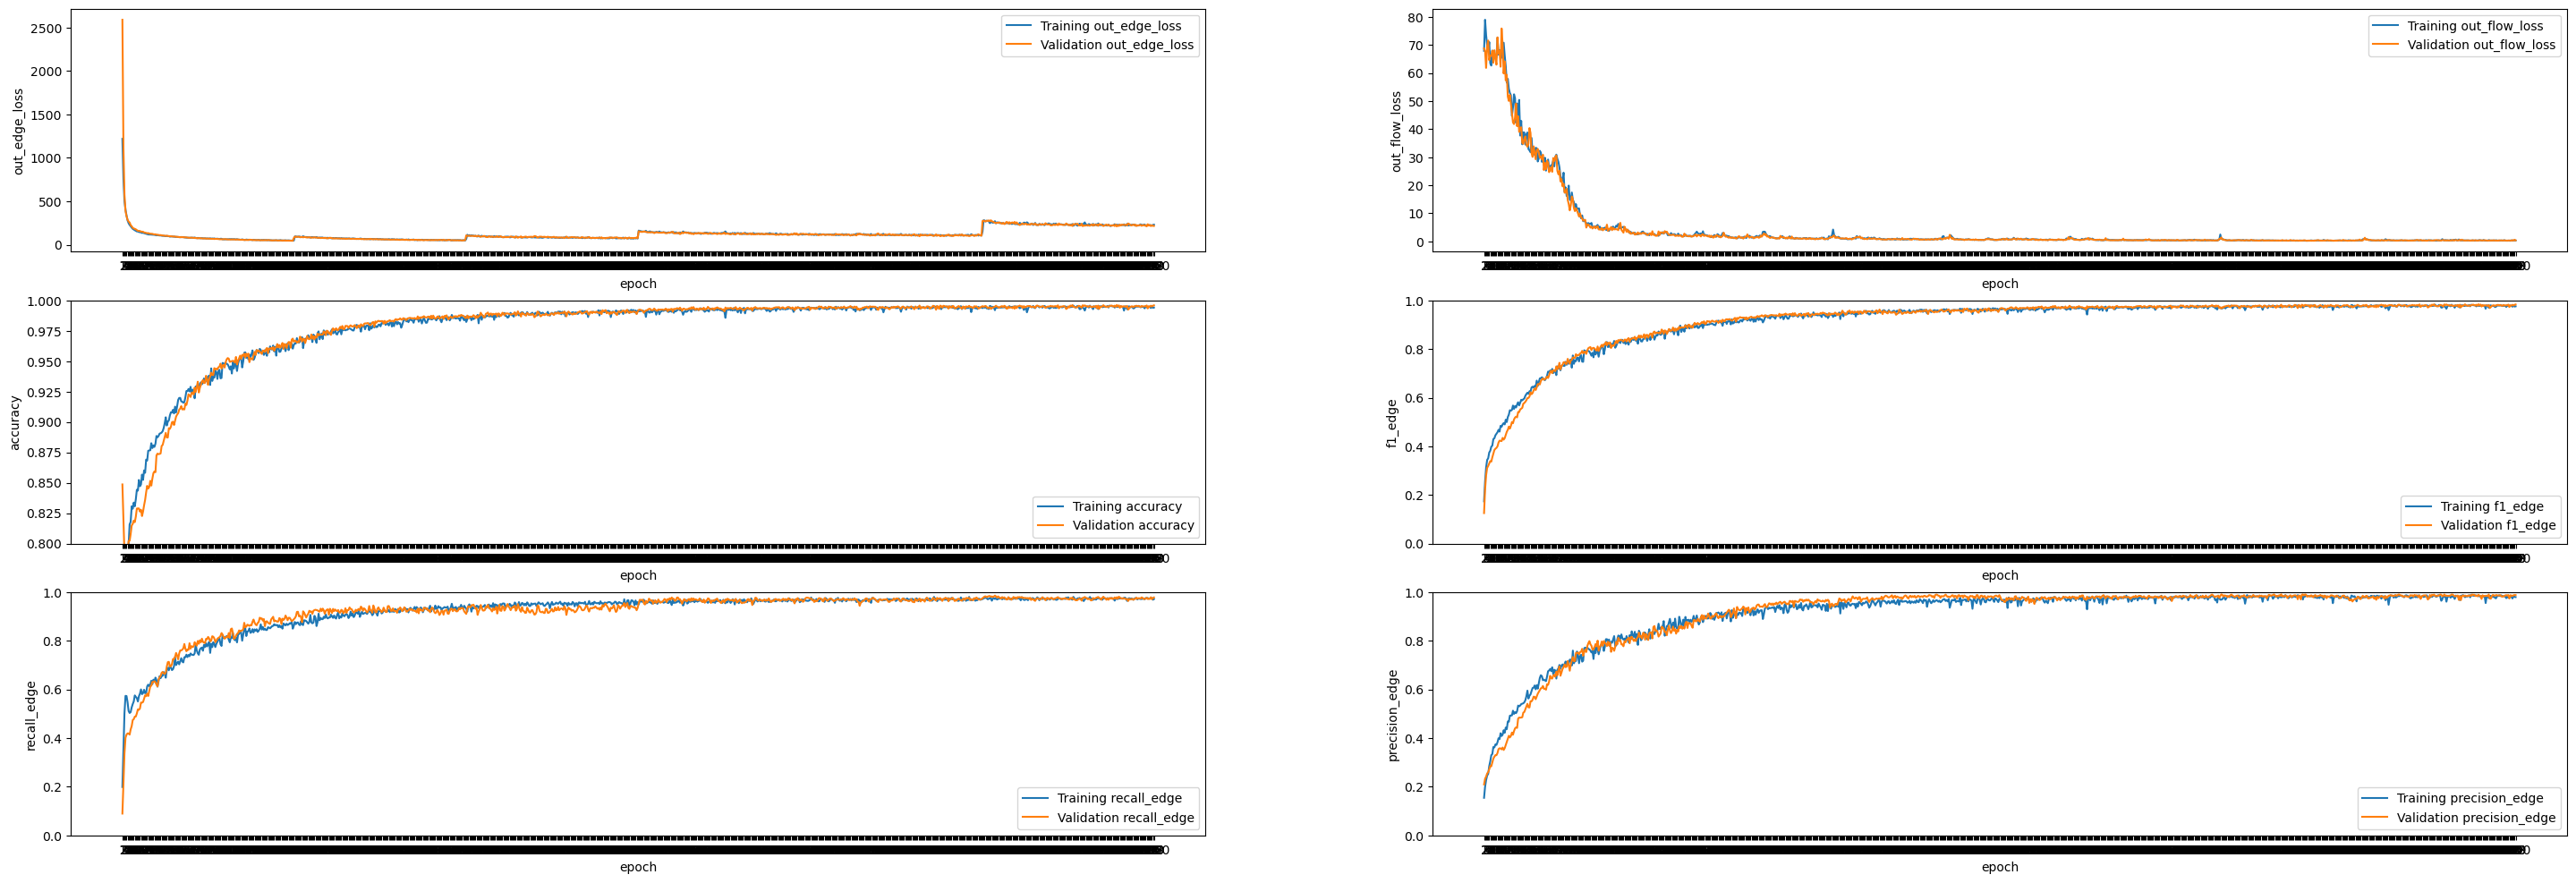

In [6]:
if Model.train_model:
    plot_losses = ["out_edge_loss", "out_flow_loss"]
    plot_metrics = ["accuracy", "f1_edge", "recall_edge", "precision_edge"]

    path = os.path.join(Model.Data.paths["FIGURES"], "training")

    plots.plot_training_history(history=history.history, list_of_loss_names=plot_losses,
                                list_of_metric_names=plot_metrics,
                                save=Model.cfg["SAVE"], path=path)

1/1 [==============================] - 0s 346ms/step


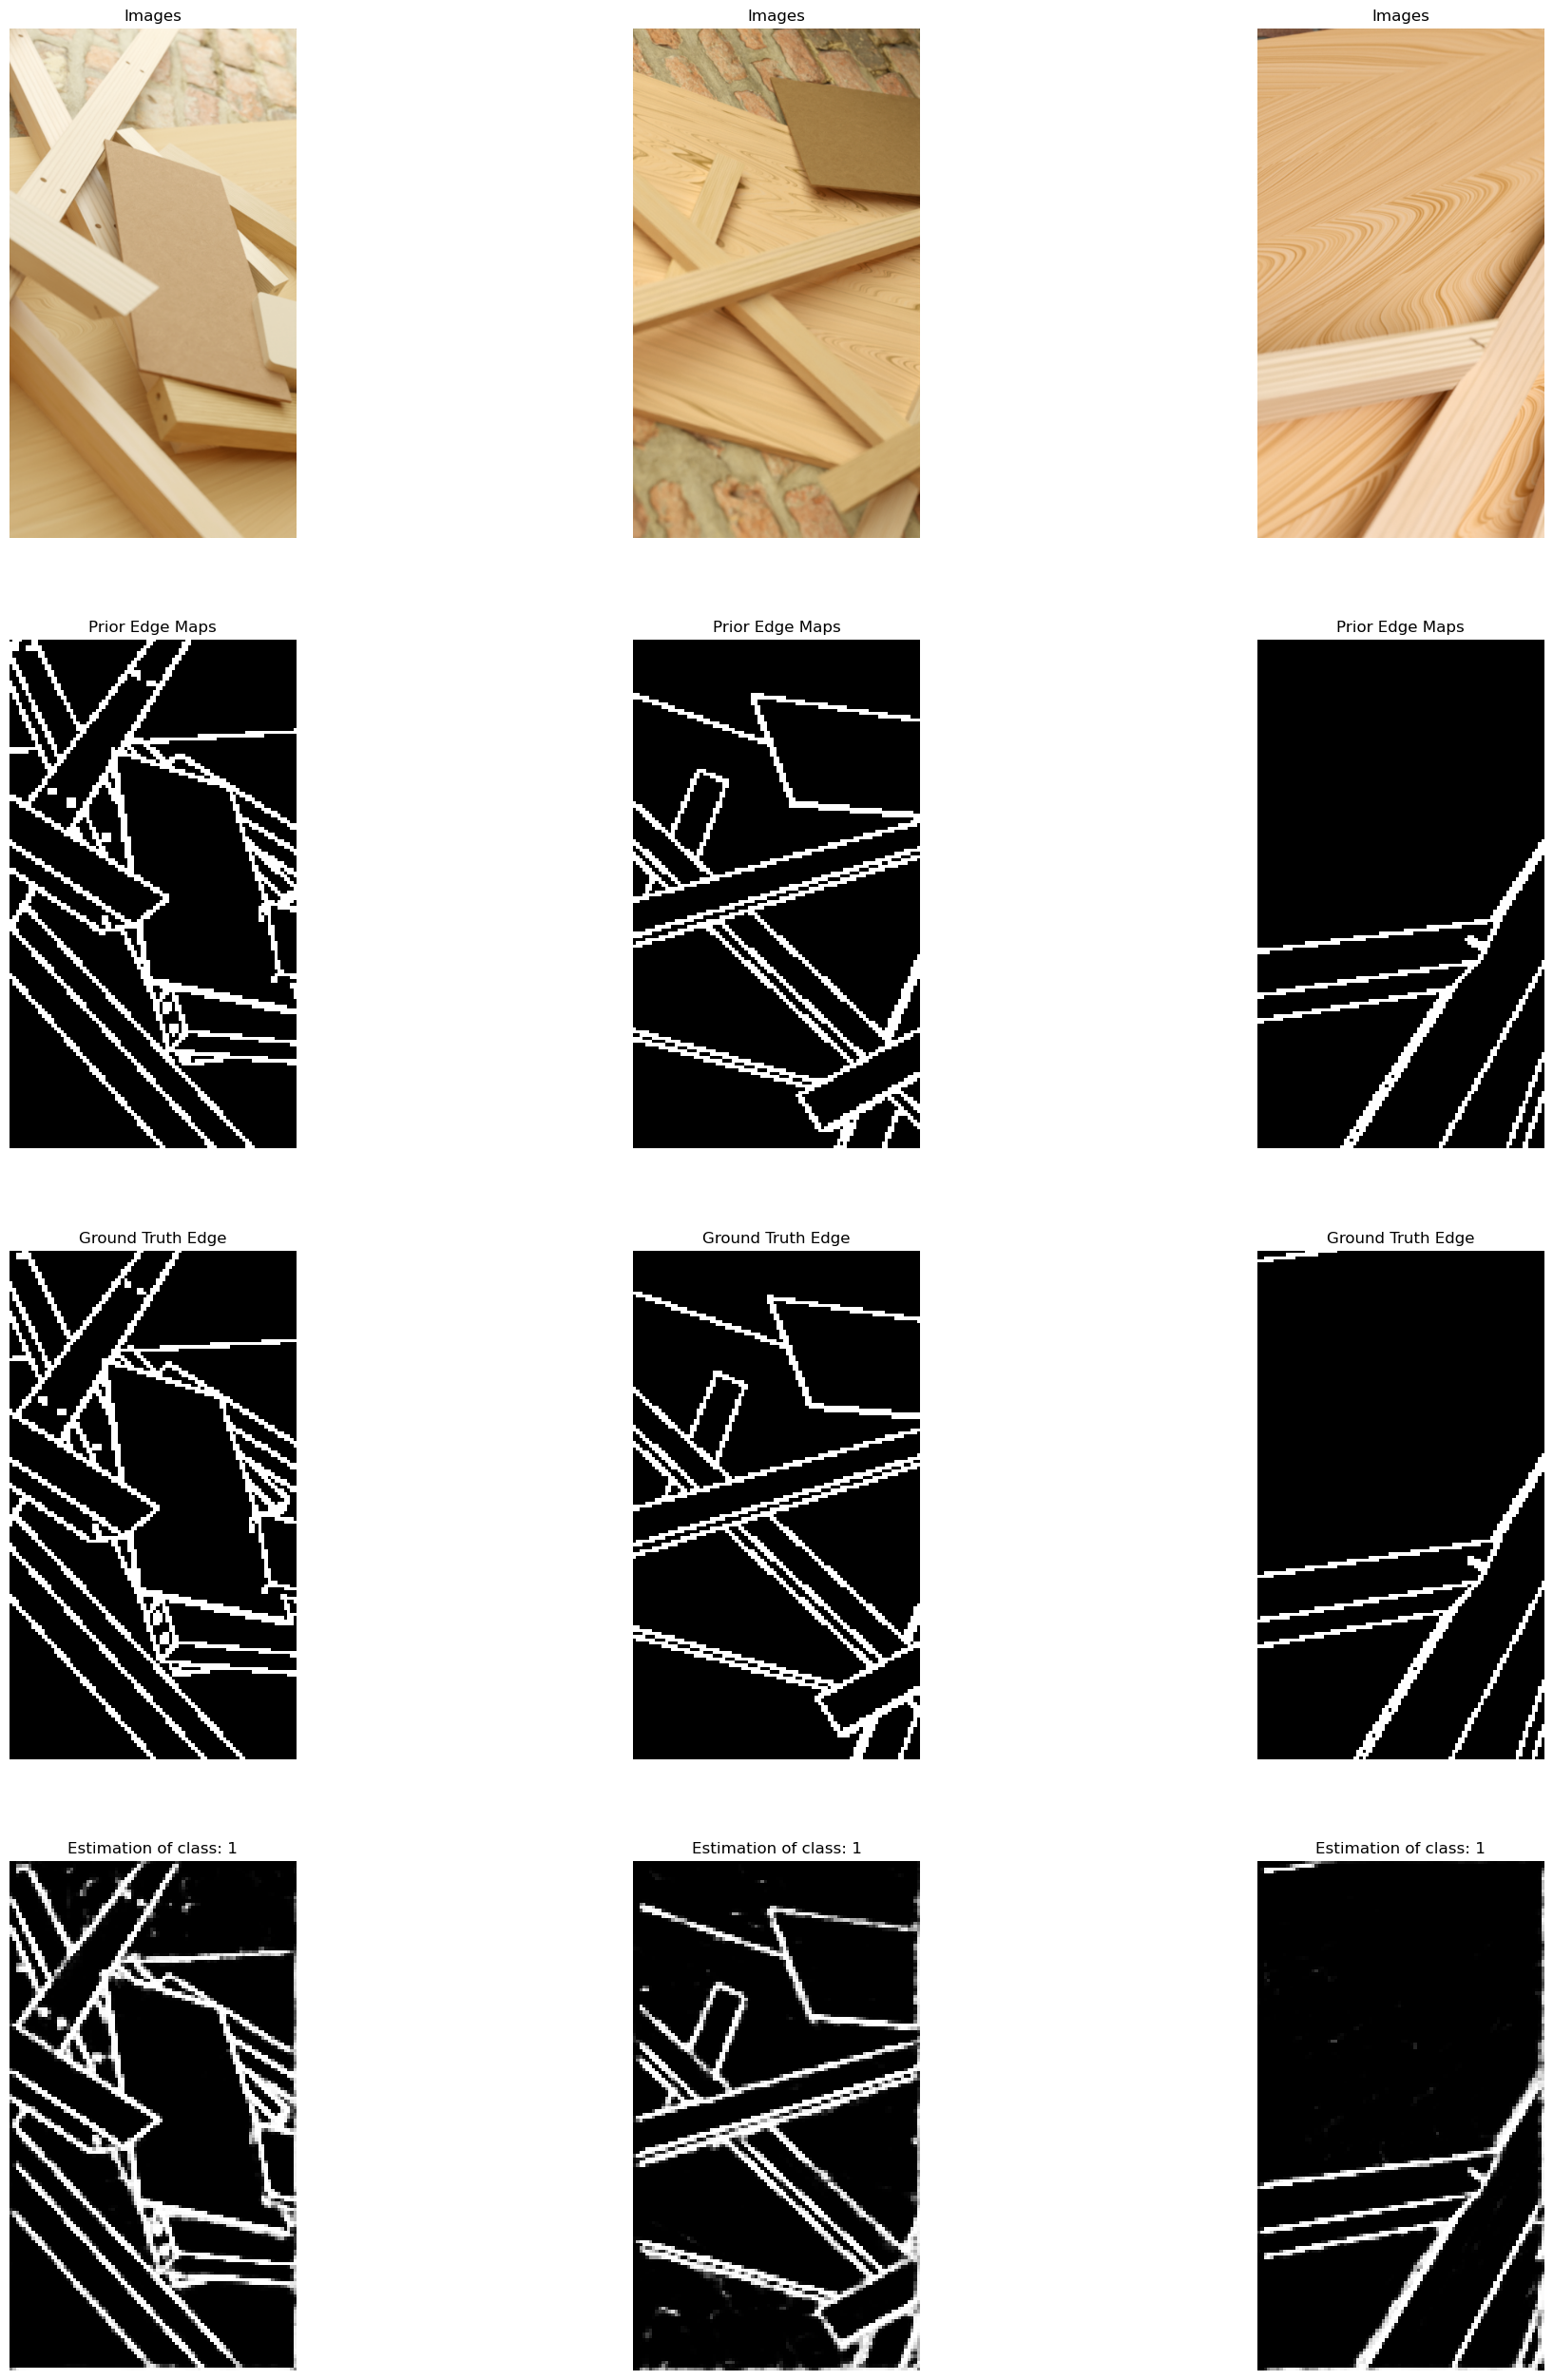

In [7]:
for inp, out in test_ds.take(1):
    pred = model.predict(inp)
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    prior=inp['in_edge'],
                                    labels_edge=out['out_edge'],
                                    predictions_edge=pred[1],
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'])

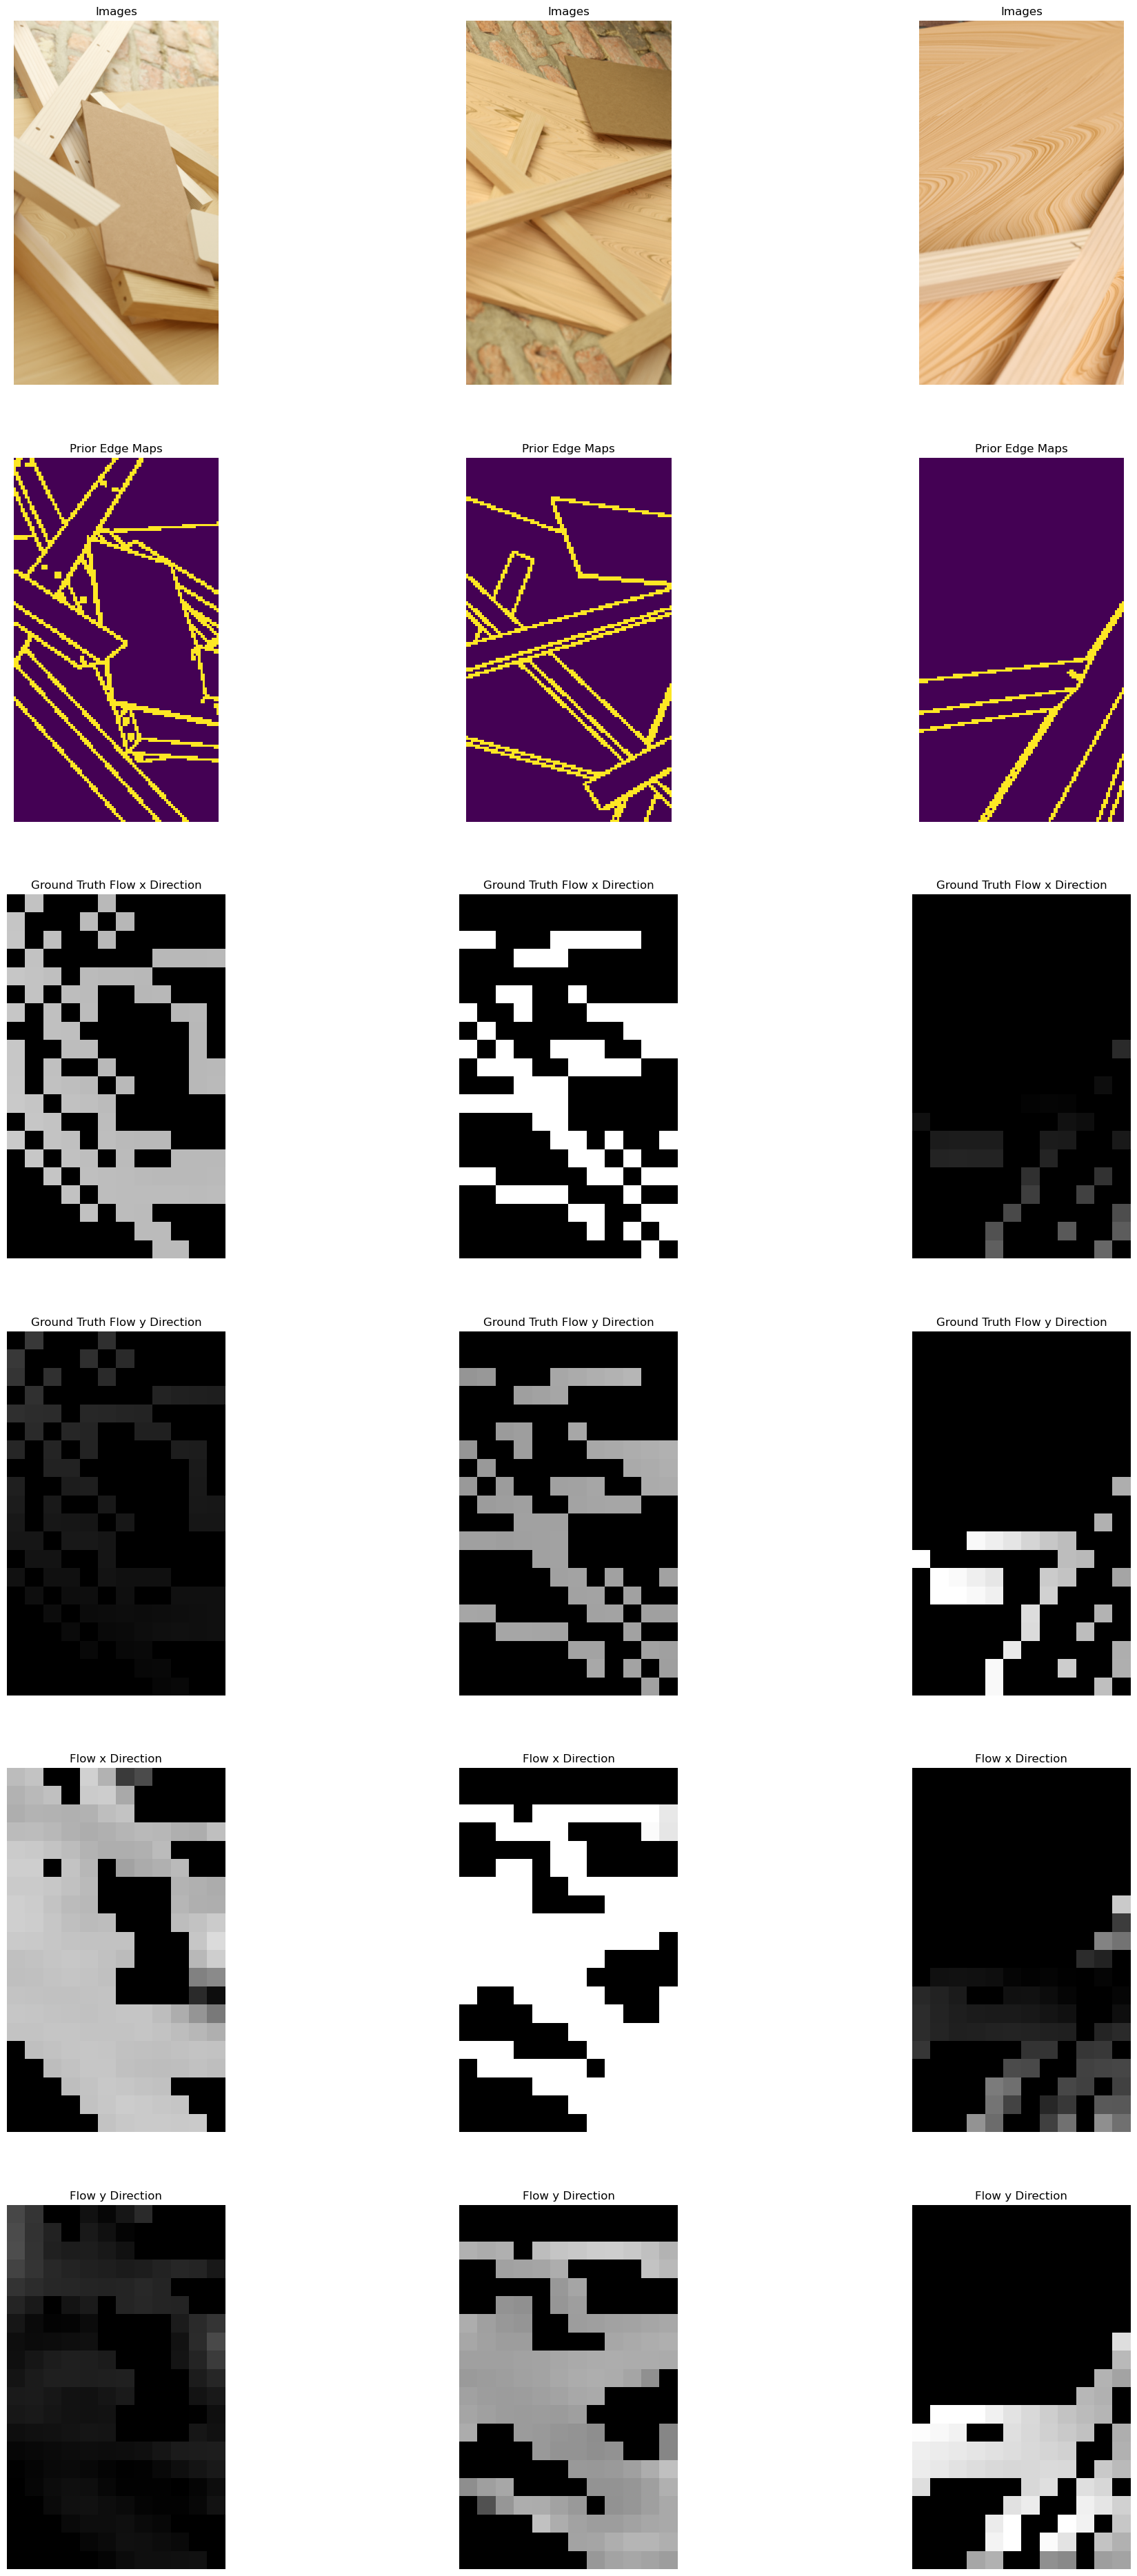

In [8]:
for inp, out in test_ds.take(1):
    flow_prediction_plots.plot_flow_field(images=inp['in_img'],
                                          prior=inp['in_edge'],
                                          flow_ground_truth=out['out_flow'],
                                          flow_prediction=pred[0],
                                          batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'])

In [9]:
if Model.cfg["CONVERT_TO_TFLITE"]:
    Model.convert_model_to_tflite(model)